In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [3]:
df34=pd.read_csv('finaldf.csv')
df34

In [ ]:
df=pd.read_json('scout_car_train.json', lines=True)
#df1=pd.read_json('scout_car_train.json', lines=True)
#df2=pd.read_json('scout_car_train.json', lines=True)
#df3=pd.read_json('scout_car_train.json', lines=True)

In [ ]:
df2=pd.read_json('scout_car_train.json', lines=True)


In [ ]:
df3=pd.read_json('scout_car_train.json', lines=True)

In [ ]:
df.head(5).T

# EXPLORATORY DATA ANALYS

In [ ]:
df3.columns

In [ ]:
df.rename(columns={"\nComfort & Convenience\n": "Comfort_Convenience",
                  "\nExtras\n": "Extras", "\nSafety & Security\n": "Safety_Security"}, inplace=True)

In [ ]:
df.info()

In [ ]:
df.info() #eskii

In [ ]:
df.describe(include='all').T

In [ ]:
choosen_list1=['make_model', 'short_description', 'body_type', 'price',
       'km', 'hp', 'Type',
        'First Registration', 'Body Color', 
        'Upholstery', 'Nr. of Doors',
       'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Cylinders', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission',  '\nComfort & Convenience\n',
        '\nExtras\n', '\nSafety & Security\n']

In [ ]:
df=df[choosen_list1]

In [ ]:
df.columns

### some used lists

In [ ]:
get_list2=['make_model','price','km','short_description','hp','First Registration','body_type',
          'Type','Body Color','Body','Gearing Type',
          'Displacement','Fuel','Consumption']

get_list=['make_model','short_description','body_type','price','km','registration','hp',
          'Type','First Registration','Body Color','Body','Gearing Type',
          'Displacement','Fuel','Consumption','CO2 Emission','Emission Class','\nComfort & Convenience\n','\nEntertainment & Media\n','\nExtras\n','\nSafety & Security\n','description']

drop_list=['url','kW','null','Offer Number','Paint Type','Body Color Original','Model Code',
          'Other Fuel Types','Last Timing Belt Service Date','Weight','description','Electricity consumption',
          'Last Service Date','Other Fuel Types','Available from']

## ANALİZLER !!

In [ ]:
def try_join2(l): # satırları liste dışına çıkar !
    if isinstance(l, list):
       
        try:
            
            return ','.join(map(str, l))
        except:
            return l
            
 

In [ ]:
#CLEAN_N96
def clean_n96(data):
    
    data=pd.DataFrame(data)
    
    cols=data.columns
    
    for col in cols:
        
        for i in  range(0, len(data[col])):                       
            b=data[col][i]
                        
            if  isinstance(b, list):
                data[col][i]=try_join2(b)
                f=try_join2(b)
                if isinstance(f, list):
                     data[col][i]=try_join2(f)
                     
                       
    return pd.DataFrame(data)

In [ ]:
df=clean_n96(df)  #  satırların  liste dışına  çıkarıldı !!  
df

In [ ]:
import re


from collections.abc import Iterable

def clean_n732(data, par):
    
    data=pd.DataFrame(data)
    
    cols=data.columns
    
    for col in cols:
        
        for i in range(0,len(data[col])):
            
            #b=[]
            
            b=data[col][i]
            #if b!= None and type(b)=='list':
            if not isinstance(b, type(None)):#and type(b)!='list':
                
                if  isinstance(b, str): 
                    #if col=='Consumption':
                          #l
                    #b=str(b)
                    # bak-    if not isinstance(id, (int, type(None))):
                    b=b.replace('\n,','')
                    b=b.replace(',\n','') 
                    b=b.replace('\n','')
                      
                    
                    b=b.replace('g CO2/km (comb)','') 
                    b=b.replace('[],[],[]','')
                    
                    b=b.replace('kW','')
                    
                    
                    b=b.replace('cc','')
                                 #l/100  (comb)
                    b=b.replace('l/100 km (comb)','')
                    b=b.replace('l/100 km (city)','')
                    b=b.replace('l/100 km (country)','')
                    
                    b=b.replace('km','') #  DİKKKAT YUKARDA DA - Bİ ÜST SATIRLARDA.
                                         #.--BENZER İFADE VARDI  HATA ALDIK FARKETMEDİKK!!!!!!
                    
                    b=b.replace('[','')
                    b=b.replace(']','')  
                    b=b.replace('"','')
                    
                    
                    #b=re.findall(r"'([^']*)'", b)
     #b=b=str(b).replace(',',' ')
      #b.replace(to_replace=[r"'[['", "']]'"], value=["",""], regex=True, inplace=True)
      #b=str(b).replace(''','')
      #b=[','.join(map(str, l)) for l in b]
      #[''.join(map(str, l)) for l in kk['description']]
    
                    if col=='Type':
                        b=b.replace(',', '')
                        b=b.strip()
                        data[col][i]=b
                
                    if col=='Consumption': 
                                                               
                        b=re.findall(r"'([^']*)'", b)
                        
                                        
                        try:
                                                                                    
                            data[col][i]=b[par]
            
                        except:
                    
                            data[col][i]=b
                    
                    else:
                        
                        b=b.strip()
                        data[col][i]=b
                        
                
                #
                
                   
    return data




  

In [ ]:
df=clean_n732(df, 0) # satırların string  ifadeleri  kırpılıyor !! 
df

In [ ]:
df.columns

In [ ]:
df=df.drop(columns=drop_list, inplace=True)

In [ ]:
drop_list=['url','kW','null','Offer Number','Paint Type','Body Color Original','Model Code',
          'Other Fuel Types','Last Timing Belt Service Date','Weight','description','Electricity consumption',
          'Last Service Date','Other Fuel Types','Available from']

In [ ]:
df.head(4)

## 'KM' COLUMN ANALYS  

In [ ]:
df.km.value_counts(dropna=False)
df.km.isna().any()

In [ ]:
type(df.km[3])

In [ ]:
df.km.value_counts(dropna=False)

In [ ]:
df.loc[df.km=='-', 'km']=None

In [ ]:


df.km=df.km.str.replace(',', '.')
df.km=df.km.str.replace('.', '')
df.km=df.km.str.replace(' ', '')


In [ ]:
a=df.km.fillna(0)
df.km=a

In [ ]:
df.km

In [ ]:
df.km=df.km.fillna(0)

## 'HP' COLUMN ANALYS  

In [ ]:
type(df.hp[3224])

In [ ]:
df.hp.isna().sum()

In [ ]:
df.hp.value_counts(dropna=False).nlargest(55)

In [ ]:
df.loc[df.hp=='-', 'hp']=None

In [ ]:
df2.loc[df2.hp=='- kW', 'hp']=None
df2.hp=df2.hp.str.replace(' kW', '')

In [ ]:
# def fill_hpviadescribe2(data): bu fonksiyon  describe da belirtilen  beygir gücünü,  beygir sütununa yazar !!

In [ ]:
  
import re

from collections.abc import Iterable

def fill_hpviadescribe2(data):
    
    data=pd.DataFrame(data)
    
    cols=data.columns
    x='pp---+%'
    v='=??_^++TT'
    
    
    t=['70cv','70ch','70 ch','70 cv',' 70 ','70\n'] #:51
    a=['75cv','75ch','75 ch','75 cv',' 75 ' ,' 75 ','75\n'] #:55
    q=['80cv','80ch','80 ch','80 cv',' 80 ','80\n'] #:59
    g=['85cv','85ch','85 ch','85 cv',' 85 ','85\n'] #:62
    k=['90cv','90ch','90 ch','90 cv', ' 90 ','90\n'] #:66
    y=['160cv','160ch','160 ch','160 cv',' 160 ','160\n'] #:118
    p=['105cv','105 cv','105 ch','105ch',' 105 ','105\n'] #77
    o=['110cv','110 cv','110 ch','110ch',' 110 ','110\n'] #81
    ö=['100cv','100 cv','100 ch','100ch',' 100 ','100\n']#74
    u=['116cv','116 cv','116 ch','116ch',' 116 ','116\n']#85
    iv=['sport tourer opel sport tourer 1.6 cdti']#100
    ig=['Country Tourer OPEL Country Tourer 1.6 CDTI']#100
    ir=['Sport Tourer OPEL Sport Tourer 1.6 CDTI']#100
    
    
    full=['70cv','70ch','70 ch','70 cv',' 70 ','70\n',
        '75cv','75ch','75 ch','75 cv',' 75 ','75\n',
        '80cv','80ch','80 ch','80 cv',' 80 ','80\n',
        '85cv','85ch','85 ch','85 cv',' 85 ','85\n',
        '90cv','90ch','90 ch','90 cv', ' 90 ','90\n',
        '160cv','160ch','160 ch','160 cv',' 160 ','160\n',
         '105cv','105 cv','105 ch','105ch',' 105 ','105\n',
         '110cv','110 cv','110 ch','110ch',' 110 ','110\n',
         '100cv','100 cv','100 ch','100ch',' 100 ','100\n',
         'sport tourer opel sport tourer 1.6 cdti',
         'Sport Tourer OPEL Sport Tourer 1.6 CDTI',
         'Country Tourer OPEL Country Tourer 1.6 CDTI',
         '116cv','116 cv','116 ch','116ch',' 116 ','116\n']
    
    #s1.str.contains('og', regex=False)
    #m=[t,a,q,g,k,y]
   # h={'t':52,'a':55,'q':59,'g':62,'k':66,'y':118}
    
    for col in cols:
        for i in range(0,len(data[col])):
             
            b=data[col][i]
            s=data[col][i]
            yz=0
            xh=[]
            #if b!= None and type(b)=='list':
            if not isinstance(b, type(None)):#and type(b)!='list':
                
                if col=='short_description' and isinstance(b, str):
                    
                    #b=str(b)
                    b=b.lower()
                    for j in range(0,len(full)):
                        v=full[j]
                        if v in b:# b.find(v) != -1:
                            xh.append(v)
                        else:
                            kjj=0
                        
                       
                    yz=[x for x in xh if any(x in item for item in a)]
                    if len(yz)>0: 
                        
                        try:
                            data['hp'][i]=float(55)
                        except:
                                       
                            data[col][i]=s   
                    yz=[x for x in xh if any(x in item for item in t)]         
                    if len(yz)>0: 
                        try:  
                            data['hp'][i]=float(51)
            
                        except:
                    
                            data[col][i]=s
                    yz=[x for x in xh if any(x in item for item in q)]    
                    if len(yz)>0: 
                        
                        try:  
                            data['hp'][i]=float(59)
            
                        except:
                    
                            data[col][i]=s
                    yz=[x for x in xh if any(x in item for item in g)]    
                    if len(yz)>0:
                        try:  
                            data['hp'][i]=float(62)
            
                        except:
                    
                            data[col][i]=s 
                    yz=[x for x in xh if any(x in item for item in k)]    
                    if len(yz)>0: 
                        try:  
                             data['hp'][i]=float(66)
            
                        except:
                    
                            data[col][i]=s 
                    yz=[x for x in xh if any(x in item for item in ö)]    
                    if len(yz)>0:
                        try:  
                             data['hp'][i]=float(74)
            
                        except:
                    
                            data[col][i]=s  
                        
                    yz=[x for x in xh if any(x in item for item in u)]    
                    if len(yz)>0:
                        try:  
                             data['hp'][i]=float(85)
            
                        except:
                    
                            data[col][i]=s    
                        
                    yz=[x for x in xh if any(x in item for item in p)]    
                    if len(yz)>0:
                        try:  
                             data['hp'][i]=float(77)
            
                        except:
                    
                            data[col][i]=s  
                        
                    yz=[x for x in xh if any(x in item for item in o)]    
                    if len(yz)>0:
                        try:  
                             data['hp'][i]=float(81)
            
                        except:
                    
                            data[col][i]=s       
                    yz=[x for x in xh if any(x in item for item in iv)]        
                    if len(yz)>0:
                        try:  
                             data['hp'][i]=float(100)
            
                        except:
                             data[col][i]=s
                    yz=[x for x in xh if any(x in item for item in ir)]        
                    if len(yz)>0:
                        try:  
                             data['hp'][i]=float(100)
            
                        except:
                             data[col][i]=s
                    
                    yz=[x for x in xh if any(x in item for item in ig)]        
                    if len(yz)>0:
                        try:  
                             data['hp'][i]=float(100)
            
                        except:
                    
                             data[col][i]=s
                    yz=[x for x in xh if any(x in item for item in y)]
                    if len(yz)>0: 
                        try:  
                             data['hp'][i]=float(118)
            
                        except:
                    
                            data[col][i]=s     
                        
                    else:
                         
                        kjj=1  
            else:
                kjj=1  
        l=[]
                #
    return data
    

In [ ]:
df=fill_hpviadescribe2(df) # tekrar boş değerler var , her bir modelin  ortalama hp  gücüne bakılarak  manuel olarak eklendi !!

In [ ]:
df.groupby('make_model')['hp'].agg(lambda s: s.mean())

In [ ]:
df['hp'][3877]=float(77)
df['hp'][8324]=float(66)
df['hp'][10473]=float(101)
df['hp'][10474]=float(101)

df['hp'][15747]=float(165)
df['hp'][15527]=float(165)
df['hp'][15391]=float(165)

df['hp'][14742]=float(77)
df['hp'][14743]=float(77)
df['hp'][14744]=float(77)
df['hp'][14745]=float(77)

df['hp'][14746]=float(77)
df['hp'][14747]=float(77)
df['hp'][14748]=float(77)
df['hp'][14749]=float(77)


df['hp'][1255]=float(85)
df['hp'][2475]=float(70)
df['hp'][4220]=float(85)
df['hp'][7107]=float(112)

df['hp'][7595]=float(112)
df['hp'][8189]=float(67)
df['hp'][10065]=float(55)
df['hp'][10480]=float(100)

df['hp'][10802]=float(104)
df['hp'][10803]=float(104)
df['hp'][10903]=float(95)
df['hp'][10904]=float(95)


df['hp'][11051]=float(100)
df['hp'][11071]=float(104)
df['hp'][11123]=float(104)
df['hp'][12318]=float(101)


df['hp'][12632]=float(123)
df['hp'][13006]=float(86)
df['hp'][13020]=float(66)
df['hp'][13060]=float(86)

df['hp'][13133]=float(86)

df['hp'][13912]=float(86)
df['hp'][13259]=float(44)


In [ ]:
df.columns

## 'TYPE' COLUMN ANALYS  

In [ ]:
df2.Type

In [ ]:
df.Type=df2.Type.copy()
df.Type=df.Type.str[1]
df.Type.value_counts(dropna=False)

In [ ]:
df[df.Type.isna()]

In [ ]:
df.Type[2738]='Used'
df.Type[5188]='New'
df.Type.value_counts(dropna=False)

## 'FİRS REGİSTRATİON' COLUMN ANALYS  

In [ ]:
def fillna_firs_register2(data):
    
    data=pd.DataFrame(data)
    
    cols=data.columns
    l=[]
    for col in cols:
        
        for i in range(0,len(data[col])):
            
            b=data[col][i]
            c=data[col][i]
            km=int(data['km'][i])
            #if b!= None and type(b)=='list':
            if pd.isnull(b) and col=='First Registration':#and type(b)!='list': 
                c=data[col][i]
                
                if data['Type'][i]=='New': 
                    
                    data['First Registration'][i]=2019.0
                elif data['Type'][i]=='Pre-registered':
                    
                    data['First Registration'][i]=2019.0
                elif data['Type'][i]=='Demonstration':
                    if km<2151:
                        data['First Registration'][i]=2019.0
                    
                    else:
                        data['First Registration'][i]=2018.0
                
                elif data['Type'][i]=='Used':
                    if km<2151:
                        data['First Registration'][i]=2019.0
                        
                    if km<17961 and km>2151:
                        data['First Registration'][i]=2018.0
                    if km<41785 and km>17961:
                        data['First Registration'][i]=2017.0
                        
                    if km>41785:
                        data['First Registration'][i]=2018.0
                
                else:                  
                    m=4
                       
            else:                
                data[col][i]=c                    
                #                
    return data


In [ ]:
df22=pd.read_csv('sunum3.csv')
df22['First Registration'].value_counts(dropna=False)
df['First Registration']=df22['First Registration'].copy()

In [ ]:
type(df22['First Registration'][22])

In [ ]:
df=fillna_firs_register2(df)

In [ ]:
df['First Registration'][2269]=2019.0
df['First Registration'][12416]=2019.0
df['First Registration'][13010]=2018.0

df[df['First Registration'].isna()]

## 'Body Color' COLUMN ANALYS  

In [ ]:
df['Body Color'].isnull().sum()

In [ ]:
color=df[~df['Body Color'].isnull()].copy()
col5=color.groupby(['make_model'])['Body Color'].unique().head(60)
col5=pd.DataFrame(col5)


col6=col5.T.copy()
col6
cols=col6.columns
dic={}
for col in cols:
    for i in range(0,len(col6)):
        
        dic[col]=col6[col][i]
for i in dic:
    print(i + str(dic[i]))
    
 

In [ ]:
colorr=df[df['Body Color']=='White']
colorr.sort_values(by=['price'], ascending=True)

In [ ]:
color=df[~df['Body Color'].isnull()].copy()
coll=color.groupby(['Body Color'])['price'].describe() #----> RENKLERİN  MİN  VE  MAX  FİYAT ARALIKLARI !!
coll=pd.DataFrame(coll)
coll=coll.sort_values(by=['mean'], ascending=False)
coll['ratio']=coll['count'] /coll['count'].sum() # ---------->  TÜM  RENKLER  İÇİNDEKİ  İLGİLİ RENGİN  ORANI !!
coll['last_ratio']=600 *coll['ratio']  # --------------------> ~~600  NULL DATA İÇİNDE OLMASI GEREKEN İLGİLİ RENK SAYISI            
col1=coll.sort_values(by=['count'], ascending=True)
col1[['last_ratio','min','max','ratio']]

In [ ]:
color=df[~df['Body Color'].isnull()].copy()
coll=color.groupby(['Body Color'])['price'].describe()
coll=pd.DataFrame(coll)
coll=coll.sort_values(by=['mean'], ascending=False)
coll

In [ ]:
color.plot.scatter(x='make_model', y='price', c='Blue', figsize=(10,8))

In [ ]:
## BOŞ  CAR COLOR SÜTUNLARI DOLDURMA!! FONKSİYONU !def fillna_color(data):

In [ ]:
df4=pd.read_csv('sunum2.csv')
df4.head(3)


In [ ]:
def fillna_color(data):
    
    data=pd.DataFrame(data)
    
    cols=data.columns
    l=[]
    dic={'Audi A1':['Black', 'Red', 'Brown', 'White', 'Grey', 'Silver', 'Blue', 'Beige', 'Violet',
 'Yellow', 'Green'],
        'Audi A2':['Grey'],
        'Audi A3':['Red', 'White', 'Blue', 'Black', 'Grey', 'Silver', 'Brown', 'Bronze', 'Orange',
 'Yellow', 'Violet'],
        'Opel Astra':['Silver', 'Grey', 'Black', 'Green', 'White', 'Beige', 'Blue', 'Red', 'Brown',
 'Gold', 'Violet'],
        'Opel Corsa':['Silver', 'White', 'Black', 'Grey', 'Blue', 'Green', 'Red', 'Yellow', 'Orange',
 'Brown', 'Gold', 'Bronze'],
        'Opel Insignia':['Blue', 'White', 'Grey', 'Black', 'Green', 'Silver', 'Brown', 'Red', 'Beige',
 'Bronze'],
        'Renault Clio':['White', 'Black', 'Grey', 'Red', 'Silver', 'Blue', 'Beige', 'Brown', 'Yellow'],
'Renault Duster':['Black' 'White'],
        'Renault Espace':['White' 'Brown' 'Black' 'Grey' 'Bronze' 'Beige' 'Violet' 'Silver' 'Blue']}
    
    
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    count5 = 0
    count6 = 0
    count7 = 0
    count8 = 0
    count9 = 0
    count10 = 0
    say=0
    
    for col in cols:
        
        for i in range(0,len(data[col])):
            
            b=data[col][i]
            c=data[col][i]
            #if b!= None and type(b)=='list':
            if pd.isnull(b) and col=='Body Color':#and type(b)!='list': 
                c=data[col][i]
                color_list=dic[data['make_model'][i]]
                for j in range(1,3):
                    if data['price'][i] <32000 and data['price'][i] >9000:
                        if 'Yellow' in color_list and count1<3:
                            
                            data['Body Color'][i]='Yellow'
                            count1+=1
                            break
                        else:
                            break
                
                
                for j in range(1,134):
                    if data['price'][i] <67600 and data['price'][i] >333:
                        if 'White' in color_list and count8<134:
                            
                            data['Body Color'][i]='White'
                            count8+=1
                            break
                        else:
                            break
                        
                
                
                for j in range(1,138):
                    if data['price'][i] <65000 and data['price'][i] >120:
                        if 'Grey' in color_list and count9<138:
                            
                            data['Body Color'][i]='Grey'
                            count9+=1
                            break
                        else:
                            break
                        
                
                for j in range(1,148):
                    if data['price'][i] <75000 and data['price'][i] >6200:
                        if 'Black' in color_list and count10<148:
                            
                            data['Body Color'][i]='Black'
                            count10+=1
                            break
                        else:
                            break
                
                
                
                
                for j in range(1,5):
                    if data['price'][i] <36800 and data['price'][i] >6500:
                        if 'Beige' in color_list and count2<5:
                            
                            data['Body Color'][i]='Beige'
                            count2+=1
                            break
                        else:
                            break
                        
                
                for j in range(1,7):
                    if data['price'][i] <38500 and data['price'][i] >6300:
                        if 'Green' in color_list and count3<7:
                            
                            data['Body Color'][i]='Green'
                            count3+=1
                            break
                        else:
                            break
                        
                
                for j in range(1,12):
                    if data['price'][i] <48000 and data['price'][i] >7000:
                        if 'Brown' in color_list and count4<12:
                            data['Body Color'][i]='Brown'
                            count4+=1
                            break
                        else:
                            break
                   
                for j in range(1,38):
                    if data['price'][i] <38500 and data['price'][i] >5000:
                        if 'Red' in color_list and count5<38:
                            
                            data['Body Color'][i]='Red'
                            count5+=1
                            break
                        else:
                            break
                        
                        
                for j in range(1,57):
                    if data['price'][i] <59000 and data['price'][i] >6000:
                        if 'Blue' in color_list and count6<57:
                            
                            data['Body Color'][i]='Blue'
                            count6+=1
                            break
                        else:
                            break
                         
                        
                for j in range(1,65):
                    if data['price'][i] <52000 and data['price'][i] >5000:
                        if 'Silver' in color_list and count7<65:
                            
                            data['Body Color'][i]='Silver'  
                            count7+=1
                            break
                        else:
                            break
                        
                #t                
                      
            else:                
                k=4
                
    #data['Body Color'].fillna('Black',limit=10)    
   # data['Body Color'].fillna('White',limit=10) #                
    return data['Body Color']

In [ ]:
def fillna_color2(df):
    for i in range(7):
        df['Body Color']=fillna_color(df)
    df['Body Color'].fillna('Black', limit=10)
    
    df['Body Color'].fillna('White')
    return df['Body Color']
    

In [ ]:
df2['Body Color'].value_counts(dropna=False)

## 'Upholstory' COLUMN ANALYS  

In [ ]:
df.Upholstery.value_counts(dropna=False)

## 'Nr. of Doors' COLUMN ANALYS    

In [ ]:
df4.body_type.value_counts(dropna=False)

In [ ]:
df4=pd.read_csv('sunum3.csv')

In [ ]:
def fill_doornumber(df4):
   
    df4.loc[df4.body_type=='Sedans', 'Nr. of Doors']=4
    df4.loc[df4.body_type=='Compact', 'Nr. of Doors']=5 
    df4.loc[df4.body_type=='Station wagon', 'Nr. of Doors']=5
    df4.loc[df4.body_type=='Van', 'Nr. of Doors']=5 
    df4.loc[df4.body_type=='Coupe', 'Nr. of Doors']=2
    df4.loc[df4.body_type=='Convertible', 'Nr. of Doors']=2
    df4.loc[df4.body_type=='Transporter', 'Nr. of Doors']=5 
    df4.loc[df4.body_type=='Off-Road', 'Nr. of Doors']=5 
    df4.loc[df4.body_type=='Other', 'Nr. of Doors']=4
    df4['Nr. of Doors'].fillna(4)
    return df4['Nr. of Doors']


In [ ]:
df4['Nr. of Doors']=fill_doornumber(df4)
df4['Nr. of Doors'].value_counts(dropna=False)

In [ ]:
df['Nr. of Doors']=df4['Nr. of Doors'].copy()

In [ ]:
df4.info()

In [ ]:
df4['Nr. of Doors'].value_counts(dropna=False).nlargest(55)

In [ ]:
df4[df4['Nr. of Doors'].isna()]

## 'Nr. of Seats' COLUMN ANALYS    

In [ ]:
df['Nr. of Seats'].value_counts(dropna=False)

In [ ]:
def fill_seatnumbers(df4):   
   
    df4.loc[df4.body_type=='Sedans', 'Nr. of Seats']=5
    df4.loc[df4.body_type=='Compact', 'Nr. of Seats']=5
    df4.loc[df4.body_type=='Station wagon', 'Nr. of Seats']=5
    df4.loc[df4.body_type=='Van', 'Nr. of Seats']=5 
    df4.loc[df4.body_type=='Coupe', 'Nr. of Seats']=2
    df4.loc[df4.body_type=='Convertible', 'Nr. of Seats']=4
    df4.loc[df4.body_type=='Transporter', 'Nr. of Seats']=3
    df4.loc[df4.body_type=='Off-Road', 'Nr. of Seats']=5 
    df4.loc[df4.body_type=='Other', 'Nr. of Seats']=4
    df4['Nr. of Seats'].fillna(4)
    return df4['Nr. of Seats']

In [ ]:
def fill_naSeats(data):
    
    data=pd.DataFrame(data)
    
    cols=data.columns
    
    for col in cols:
        
        for i in range(0,len(data[col])):
            
            b=data[col][i]
            c=data[col][i]
            #if b!= None and type(b)=='list':
            if pd.isnull(b) and col=='Nr. of Seats':#and type(b)!='list': 
                c=data[col][i]
                
                if data['body_type'][i]=='Sedans': 
                    
                    data['Nr. of Seats'][i]=5
                elif data['body_type'][i]=='Compact':
                    
                    data['Nr. of Seats'][i]=5
                elif data['body_type'][i]=='Station wagon':
                    
                    data['Nr. of Seats'][i]=5
                
                elif data['body_type'][i]=='Van':
                    
                    data['Nr. of Seats'][i]=5
                    
                elif data['body_type'][i]=='Coupe':
                    
                    data['Nr. of Seats'][i]=2
                    
                elif data['body_type'][i]=='Convertible':
                    
                    data['Nr. of Seats'][i]=4    
                    
                elif data['body_type'][i]=='Transporter':
                    
                    data['Nr. of Seats'][i]=3
                    
                elif data['body_type'][i]=='Off-Road':
                    
                    data['Nr. of Seats'][i]=5
                    
                elif data['body_type'][i]=='Other':
                    
                    data['Nr. of Seats'][i]=5   
                
                else:                  
                    k=4
                       
            else:                
                data[col][i]=c 
    data.loc[data['Nr. of Seats']==1, 'Nr. of Seats']=2          
    return data['Nr. of Seats'].fillna(method='ffill')

## 'GEARİNG  TYPE'    COLUMN ANALYS    

In [ ]:
df3['Gearing Type'].str[1].value_counts(dropna=False)  #  boş değer  yok !!

## 'DISPLACEMENT'  COLUMN ANALYS    

In [ ]:
import re

# tam bitmedi !!!
from collections.abc import Iterable

def clean_Displacement1(data):    #   yanlış  yazılmış  motor hacimleri  düzeltme !!
    
    data=pd.DataFrame(data)
    
    cols=data.columns
    
   
    for col in cols:
        
        for i in range(0,len(data[col])):
            
            #b=[]
            
            b=data[col][i]
            #if b!= None and type(b)=='list':
            if not isinstance(b, type(None)):#and type(b)!='list':
                
                if  isinstance(b, float): 
                    
                    if col=='Displacement':
                        if b==999.000:
                            data[col][i]=0.999
                        elif b==999:
                            data[col][i]=0.999  
                        elif b==898:
                            data[col][i]=0.898
                        elif b==898.000:
                            data[col][i]=0.898 
                        elif b==998.000:
                            data[col][i]=0.998
                        elif b==998:
                            data[col][i]=0.998
                        elif b==899:
                            data[col][i]=0.899
                        elif b==160:
                            data[col][i]=1.6
                        elif b==929 :
                            data[col][i]=0.929 
                            
                        elif b==997 :
                            data[col][i]=0.997
                        elif b==900 :
                            data[col][i]=0.9 
                            
                        elif b==139 :
                            data[col][i]=1.39 
                            
                        elif b==995 :
                            data[col][i]=0.995
                            
                        elif b==890 :
                            data[col][i]=0.890
                            
                        elif b==54 :
                            data[col][i]=1.149  
                            
                        elif b==16.000 :
                            data[col][i]=1.6
                        
                        elif b==996 :
                            data[col][i]=0.996
                            
                        elif b==140 :
                            data[col][i]=1.4 
                            
                        elif b==973 :
                            data[col][i]=0.973     
                            
                        elif b==122:
                            data[col][i]=1.22 
                        elif b==15.898:
                            data[col][i]=1.5898
                            
                       
                    else:
                       
                        data[col][i]=b
                       
                #
                
    return data['Displacement']



In [ ]:
import re


from collections.abc import Iterable

def convert_displacementtofloat(data):
    
    
    data=pd.DataFrame(data)
    
    cols=data.columns
    l=[]
    a=','
    for col in cols:
        
        for i in range(0,len(data[col])):
            
            
            b=data[col][i]
            
            
            #if b!= None and type(b)=='list':
            if not isinstance(b, type(None)):#and type(b)!='list':
                
                if not isinstance(b, list):
                  
                    b=str(b)
                    if a in b:
                       
                        if containsNumber(b):
                           
                            b=b.replace(',','.')
                            
                       
                        try:
                                          
                            data[col][i]=float(b)
                        except:
                                       
                            data[col][i]=None    
                             
                    elif not a  in b:
                            
                        try:  
                            
                            data[col][i]=float(b)
            
                        except:
                    
                            data[col][i]=None
                        
                    else:
                         
                        
                        data[col][i]=b   
                    l=[]
                #
                
    return data['Displacement']


In [ ]:
  
import re

from collections.abc import Iterable

def fill_displacementvia_describe(data):
    
    data=pd.DataFrame(data)
    
    cols=data.columns
    l=[]
    x='pp---+%'
    v='=??_^++TT'
    hatsay=0
    
    a=['1.0',' 1.0 ','1,0',' 1,0 ','1cdt',' 1.0cdt',' 1,0',' 1.0\n'] #0.9864
    ac=['1.1',' 1.1 ','1.1cdt','1,1',' 1,1 ','1.1\n'] #1.1
    t=['1.2',' 1.2 ','1.2cdt','1,2',' 1,2 ','1.2\n'] #1.206  
    q=['1.3',' 1.3 ',' 1.3cdt','1,3',' 1,3 ','1.3\n'] #1.36
    g=['1.4',' 1.4 ',' 1.4cdt','1,4',' 1,4 ','1.4\n'] #1.41
    k=['1.5',' 1.5 ',' 1.5cdt','1,5',' 1,5 ','1.5\n'] #1.493
    y=['1.6',' 1.6 ',' 1.6cdt','1,6',' 1,6 ','1.6\n'] #1.598
    p=['1.7',' 1.7 ',' 1.7cdt','1,7',' 1,7 ','1.7\n'] #1.7
    o=['1.8',' 1.8 ',' 1.8cdt','1,8',' 1,8','1.8\n'] #1.798
    ö=['1.9',' 1.9 ',' 1.9cdt','1,9',' 1,9 ','1.9\n'] #1.9
    iv=['2.0',' 2.0 ',' 2.0cdt','2,0',' 2,0 ','2.0\n'] #1.965
    ic=['2.5',' 2.5 ',' 2.5cdt','2,5',' 2,5 ','2.5\n'] #2.48
    ih=['3.0',' 3.0 ',' 3.0cdt','3,0',' 3,0 ','3.0\n'] #2.967
    
    
    
    
    full=['1.2',' 1.2 ','1.2cdt','1,2',' 1,2 ','1.2\n',
        '1.0',' 1.0 ','1,0',' 1,0 ','1cdt',' 1.0cdt',' 1,0',' 1.0\n',
        '1.3',' 1.3 ',' 1.3cdt','1,3',' 1,3 ','1.3\n',
        '1.4',' 1.4 ',' 1.4cdt','1,4',' 1,4 ','1.4\n',
        '1.5',' 1.5 ',' 1.5cdt','1,5',' 1,5 ','1.5\n',
        '1.6',' 1.6 ',' 1.6cdt','1,6',' 1,6 ','1.6\n',
         '1.7',' 1.7 ',' 1.7cdt','1,7',' 1,7 ','1.7\n',
         '1.8',' 1.8 ',' 1.8cdt','1,8',' 1,8','1.8\n',
         '1.9',' 1.9 ',' 1.9cdt','1,9',' 1,9 ','1.9\n',
         '2.0',' 2.0 ',' 2.0cdt','2,0',' 2,0 ','2.0\n',
         '2.5',' 2.5 ',' 2.5cdt','2,5',' 2,5 ','2.5\n',
         '3.0',' 3.0 ',' 3.0cdt','3,0',' 3,0 ','3.0\n']
    
    #s1.str.contains('og', regex=False)
    #m=[t,a,q,g,k,y]
   # h={'t':52,'a':55,'q':59,'g':62,'k':66,'y':118}
    
    for col in cols:
        for i in range(0,len(data[col])):
            
            b=data[col][i]
            s=data[col][i]
            dis=data['Displacement'][i]
            yz=0
            xh=[]
            
            #if b!= None and type(b)=='list':
            if not isinstance(b, type(None)):#and type(b)!='list':
                
                if col=='short_description' and isinstance(b, str):
                   
                    b=b.lower()
                    for j in range(0,len(full)):
                        v=full[j]
                        if v in b:# b.find(v) != -1:
                            xh.append(v)
                        else:
                            kjj=0
                        
                       
                    yz=[x for x in xh if any(x in item for item in a)]
                    if len(yz)>0:
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(0.986)
                            
                            except:
                                data[col][i]=s  
                                
                    yz=[x for x in xh if any(x in item for item in ac)]
                    if len(yz)>0:
                        
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.1)
                            
                            except:
                                data[col][i]=s 
                    yz=[x for x in xh if any(x in item for item in t)]
                    if len(yz)>0:
                       
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.206)
                            
                            except:
                                data[col][i]=s 
                    yz=[x for x in xh if any(x in item for item in q)]
                    if len(yz)>0:
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.36)
                            
                            except:
                                data[col][i]=s 
                    yz=[x for x in xh if any(x in item for item in g)]
                    if len(yz)>0:
                        
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.41)
                            
                            except:
                                data[col][i]=s   
                    yz=[x for x in xh if any(x in item for item in k)]
                    if len(yz)>0:
                        
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.493)
                            
                            except:
                                data[col][i]=s  
                    yz=[x for x in xh if any(x in item for item in y)]
                    if len(yz)>0:
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.598)
                            
                            except:
                                data[col][i]=s      
                    yz=[x for x in xh if any(x in item for item in p)]
                    if len(yz)>0:
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.7)
                            
                            except:
                                data[col][i]=s  
                    yz=[x for x in xh if any(x in item for item in o)]
                    if len(yz)>0:
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.798)
                            
                            except:
                                data[col][i]=s      
                    yz=[x for x in xh if any(x in item for item in ö)]
                    if len(yz)>0:
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.9)
                            
                            except:
                                data[col][i]=s 
                    yz=[x for x in xh if any(x in item for item in iv)]
                    if len(yz)>0:
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.965)
                            
                            except:
                                data[col][i]=s 
                    yz=[x for x in xh if any(x in item for item in ic)]
                    if len(yz)>0:
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(2.48)
                            
                            except:
                                data[col][i]=s     
                    yz=[x for x in xh if any(x in item for item in ih)]
                    if len(yz)>0:
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(2.967)
                            
                            except:
                                data[col][i]=s  
                    
                    else:
                         
                        kjj=1  
            else:
                kjj=1  
        l=[]
                #
    return data['Displacement']
    

In [ ]:
  
import re

from collections.abc import Iterable

def fill_displacerenopel(data):  #  ağırlıklı olarak    reno  ve  opel grubunda eksik  motor hacimleri var ,, short_description sütunun dan yazılı motor hacimleri
                                                                                                                 # çekildi !!!
    data=pd.DataFrame(data)
    
    cols=data.columns
    l=[]
    x='pp---+%'
    v='=??_^++TT'
   
    
    a=[' 160 Energy Twin Turbo ','dCi 160 EDC Elysee','INTENS Energy dCi','INTENS 160 DCI',
       'EXECUTIVE Energy dCi 160 EDC','INITIALE PARIS ENERGY ',
       'INITIALE P. ENERGY ','INITIALE P. ENERGY ','initiale Paris','dCi 160 Energy Twin Turbo',
      'V ZEN ENERGY 7 PLACES dCi 160 EDC'] # 1.598
    
    ac=['Tce 225 EDC','TCe 225 EDC','225 ','INITALE 225 CV','INITIALE PARIS TCE 225'] #1.798
    t=['Blue dCi ','2019 Life dCi 160 BLUE'] #1.997 
    q=[' Initiale Paris Energy '] #1.598
    g=['INITIALE PARIS TCE 225'] #1.798 ccm
    ###########################
    k=['IV SOCIETE DCI 75 ENERGY','IV ESTATE dCi 90','dCi 8V 90 CV EDC','EXCITE Energy dCi 90',
      'INTENS ENERGY dCI 90','IV SOCIETE DCI 90 ENERGY','Air Energy dCi 75',
      '4 BUSINESS DCI 90','Limited','Business Energy dCi 55'] #1.461  1 461 1461
    
    y=['Grandtour TCe120 EDC'] #1.197
   
    p=['SPORT RS'] #1.618
    o=['Grandtour Klima/GRA/Radio/Aktion TCe 75',
       'Grandtour Limited - LM/Navi/PDC/Aktion TCe 75',
       '4 Life NEUVE 0.9 Tce 75','Clio Grandtour Life TCe 75',
      'Grandtour Klima/GRA/Radio/Aktion TCe 90'] #0.898 ccm
    ö=['TCe 75 Limited Premium Navi Klima'] #1.2
    ################################
    
    
    iv=['2.8 OPC 4x4 Turbo Sports'] #2,792
   
    ic=['SELECTIVE ST','2 SPORT TOURER EDITION','Sports Tourer Innovation','GSI'] #1.598
    ih=['Grandtour Klima/GRA/Radio/Aktion TCe 75'] #1,956  ccm
    iz=['Benz. / Navi / Alu velgen / Park. Sens'] #1.364
    ij=['GS/Innovation/LED/Alcantara/FlexRide'] #1.998
    
    
    
    full=[' 160 Energy Twin Turbo ','dCi 160 EDC Elysee','INTENS Energy dCi','INTENS 160 DCI','EXECUTIVE Energy dCi 160 EDC','INITIALE PARIS ENERGY ','INITIALE P. ENERGY ','INITIALE P. ENERGY ','initiale Paris',
        'Tce 225 EDC','TCe 225 EDC','225 ','INITALE 225 CV','INITIALE PARIS TCE 225',
        ' Initiale Paris Energy ','Tce 225 EDC','TCe 225 EDC','225 ','INITALE 225 CV','INITIALE PARIS TCE 225',
        'INITIALE PARIS TCE 225','IV SOCIETE DCI 75 ENERGY','IV ESTATE dCi 90','dCi 8V 90 CV EDC','EXCITE Energy dCi 90',
      'INTENS ENERGY dCI 90','IV SOCIETE DCI 90 ENERGY','Air Energy dCi 75','Blue dCi ',' Initiale Paris Energy ',
      '4 BUSINESS DCI 90','Limited','Business Energy dCi 55','INITIALE PARIS TCE 225','IV SOCIETE DCI 75 ENERGY','IV ESTATE dCi 90','dCi 8V 90 CV EDC','EXCITE Energy dCi 90',
      'INTENS ENERGY dCI 90','IV SOCIETE DCI 90 ENERGY','Air Energy dCi 75','Grandtour TCe120 EDC','SPORT RS',
      '4 BUSINESS DCI 90','Limited','Business Energy dCi 55','Grandtour Klima/GRA/Radio/Aktion TCe 75','SELECTIVE ST','2 SPORT TOURER EDITION','Sports Tourer Innovation','GSI',
       'Grandtour Limited - LM/Navi/PDC/Aktion TCe 75','2.8 OPC 4x4 Turbo Sports','Grandtour Klima/GRA/Radio/Aktion TCe 75',
       '4 Life NEUVE 0.9 Tce 75','Clio Grandtour Life TCe 75','Benz. / Navi / Alu velgen / Park. Sens','GS/Innovation/LED/Alcantara/FlexRide',
      'Grandtour Klima/GRA/Radio/Aktion TCe 90','TCe 75 Limited Premium Navi Klima']
         
    
  
    for col in cols:
        for i in range(0,len(data[col])):
            
            b=data[col][i]
            s=data[col][i]
            dis=data['Displacement'][i]
            car=data['make_model'][i]
            yz=0
            xh=[]
            
            #if b!= None and type(b)=='list':
            if not isinstance(b, type(None)):#and type(b)!='list':
                
                if col=='short_description' and isinstance(b, str):
                   
                    bb=b.lower()
                    for j in range(0,len(full)):
                        v=full[j]
                        vv=v.lower()
                        if vv in bb or v in b:# b.find(v) != -1:
                            xh.append(vv)
                            xh.append(v)
                        else:
                            kjj=0
                        
                       
                    yz=[x for x in xh if any(x in item for item in a)]
                    if len(yz)>0 and car=='Renault Espace':
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.598)
                            
                            except:
                                data[col][i]=s  
                                
                    yz=[x for x in xh if any(x in item for item in ac)]
                    if len(yz)>0 and car=='Renault Espace':
                        
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.798)
                            
                            except:
                                data[col][i]=s 
                    yz=[x for x in xh if any(x in item for item in t)]
                    if len(yz)>0 and car=='Renault Espace':
                       
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.997)
                            
                            except:
                                data[col][i]=s 
                    yz=[x for x in xh if any(x in item for item in q)]
                    if len(yz)>0 and car=='Renault Espace':
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.598)
                            
                            except:
                                data[col][i]=s 
                    yz=[x for x in xh if any(x in item for item in g)]
                    if len(yz)>0 and car=='Renault Espace':
                        
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.798)
                            
                            except:
                                data[col][i]=s   
                    yz=[x for x in xh if any(x in item for item in k)]
                    if len(yz)>0 and car=='Renault Clio':
                        
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.461)
                            
                            except:
                                data[col][i]=s  
                    yz=[x for x in xh if any(x in item for item in y)]
                    if len(yz)>0 and car=='Renault Clio':
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.197)
                            
                            except:
                                data[col][i]=s      
                    yz=[x for x in xh if any(x in item for item in p)]
                    if len(yz)>0 and car=='Renault Clio':
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.618)
                            
                            except:
                                data[col][i]=s  
                    yz=[x for x in xh if any(x in item for item in o)]
                    if len(yz)>0 and car=='Renault Clio':
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(0.898)
                            
                            except:
                                data[col][i]=s      
                    yz=[x for x in xh if any(x in item for item in ö)]
                    if len(yz)>0 and car=='Renault Clio':
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.2)
                            
                            except:
                                data[col][i]=s 
                    yz=[x for x in xh if any(x in item for item in iv)]
                    if len(yz)>0 and car=='Opel Insignia':
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(2.792)
                            
                            except:
                                data[col][i]=s  
                    yz=[x for x in xh if any(x in item for item in ic)]
                    if len(yz)>0 and car=='Opel Insignia':
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.598)
                            
                            except:
                                data[col][i]=s     
                    yz=[x for x in xh if any(x in item for item in ih)]
                    if len(yz)>0 and car=='Opel Insignia':
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1,956)
                            
                            except:
                                data[col][i]=s  
                    yz=[x for x in xh if any(x in item for item in iz)]
                    if len(yz)>0 and car=='Opel Insignia':
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.364)
                            
                            except:
                                data[col][i]=s  
                    
                    yz=[x for x in xh if any(x in item for item in ij)]
                    if len(yz)>0 and car=='Opel Insignia':
                        if pd.isnull(data['Displacement'][i]):
                            try:
                                
                                data['Displacement'][i]=float(1.998)
                            
                            except:
                                data[col][i]=s  
                    
                    else:
                         
                        kjj=1  
            else:
                kjj=1  
        l=[]
                #
    return data['Displacement']
    

In [ ]:
from statistics import mode
def displacementfill_mode(data, column_name):  # kalan  eksik motor hacimleri , ilgili boş sütunun üst ve  altındaki 10 datanın modundan tamamlanıyor!!
    
    data=pd.DataFrame(data)
    
    cols=data.columns
    l=[]
    
    for col in cols:
        
        for i in range(0,len(data[col])):
           
            l=[]
            b=data[col][i]
            
            
            #if b!= None and type(b)=='list':
            if col==column_name and pd.isnull(data[column_name][i]):#and type(b)!='list':
                
                index_low=i-5
                index_high=i+5
                if index_low<0:
                    index_low=0
                    
                    #b.str.contains('\n,').any()==False:
                if  index_high>=len(data[col]):
                    index_high=len(data[col])-1
                        
                for j in range(index_low,index_high):
                    if pd.isnull(data[column_name][j]):
                        kl=0
                    else:
                        l.append(data[column_name][j])
                                
                        
                         #yz=[x for x in xh if any(x in item for item in a)]
                    if len(l)>0:
                        mod=mode(l)
                        try:
                                
                            data[column_name][i]=mod
                            
                        except:
                            data[col][i]=b  
                        
                    else:
                        
                        data[col][i]=b   
                    l=[]
                #
                
    return data['Displacement']


In [ ]:
def containsNumber(value):
    for character in value:
        if character.isdigit():
            return True
    return False

In [ ]:
dff=df.copy()
dff.Displacement=clean_Displacement1(df)
dff.Displacement=convert_displacementtofloat(df)
dff.Displacement=fill_displacementvia_describe(df)
dff.Displacement=fill_displacerenopel(df)
dff.Displacement=displacementfill_mode(df, 'Displacement')
print(str(dff.isna().sum()))
dff.value_counts(dropna=False)



In [ ]:
dff.Displacement.value_counts(dropna=False).nlargest(55)

In [ ]:
disp_mean=round(dff.Displacement.mean().astype('float16'),1)
disp_mean

In [ ]:
dff.Displacement.isna().sum()

In [ ]:
'to_displacement.csv'

In [ ]:
dummydff=pd.read_csv('to_displacement.csv')
dummydff

## 'FUELL'  COLUMN ANALYS    

In [ ]:
  
import re                                  ### clean fuel fonksiyonuyla fuel sütunu düzenlendi !!
                                            
from collections.abc import Iterable

def clean_fuel(data):
    
    data=pd.DataFrame(data)
    
    cols=data.columns
    l=[]
    x='pp---+%'
    v='=??_^++TT'
    hatsay=0
    
    benzine_list=['Benzine','Super','91','E10','95','98',
                'Gasoline','Regular','Super 95 / Biodiesel']
    
    diesel_list=['Diesel','Diesel (Particulate Filter)','Others (Particulate Filter)']
    
    cng_list=['CNG','CNG (Particulate Filter)','Domestic gas H','Biogas']

    lpg_list=['LPG','Liquid petroleum gas (LPG)']
    
    
    
    a=['Benzine','Super','91','E10','95','98',
                'Gasoline','Regular','Super 95 / Biodiesel'] #BENZINE
    ac=['Diesel','Diesel (Particulate Filter)','Others (Particulate Filter)'] #DIESEL
    t=['CNG','CNG (Particulate Filter)','Domestic gas H','Biogas'] #CNG
    q=['LPG','Liquid petroleum gas (LPG)'] #LPG
    
    
    full=['Benzine','Super','91','E10','95','98',
                'Gasoline','Regular','Super 95 / Biodiesel',
        'Diesel','Diesel (Particulate Filter)','Others (Particulate Filter)',
        'CNG','CNG (Particulate Filter)','Domestic gas H','Biogas',
        'LPG','Liquid petroleum gas (LPG)']
        
  
    for col in cols:
        for i in range(0,len(data[col])):
            
            b=data[col][i]
            s=data[col][i]
            dis=data['Fuel'][i]
            yz=0
            xh=[]
            
            #if b!= None and type(b)=='list':
            if not isinstance(b, type(None)):#and type(b)!='list':
                
                if col=='Fuel' and isinstance(b, str):
                   
                    #b=b.lower()
                    for j in range(0,len(full)):
                        v=full[j]
                        if v in b:# b.find(v) != -1:
                            xh.append(v)
                        else:
                            kjj=0
                        
                       
                    yz=[x for x in xh if any(x in item for item in a)]
                    if len(yz)>0:
                        if not pd.isnull(data['Fuel'][i]):
                            try:
                                
                                data['Fuel'][i]='BENZINE'
                            
                            except:
                                data[col][i]=s  
                                
                    yz=[x for x in xh if any(x in item for item in ac)]
                    if len(yz)>0:
                        
                        if not pd.isnull(data['Fuel'][i]):
                            try:
                                
                                data['Fuel'][i]='DIESEL'
                            
                            except:
                                data[col][i]=s 
                    yz=[x for x in xh if any(x in item for item in t)]
                    if len(yz)>0:
                       
                        if not pd.isnull(data['Fuel'][i]):
                            try:
                                
                                data['Fuel'][i]='CNG'
                            
                            except:
                                data[col][i]=s 
                    yz=[x for x in xh if any(x in item for item in q)]
                    if len(yz)>0:
                        if not pd.isnull(data['Fuel'][i]):
                            try:
                                
                                data['Fuel'][i]='LPG'
                            
                            except:
                                data[col][i]=s 
                   
                    
                    else:
                         
                        kjj=1  
            else:
                kjj=1  
        l=[]
                #
    return data.Fuel
    

In [ ]:
dummy.Consumption.isna().sum()

## 'CONSUMPTİON'  COLUMN ANALYS    

In [ ]:
import re

from collections.abc import Iterable

def clean_nConsup3(data, par):
    
    data=pd.DataFrame(data)
    
    cols=data.columns
    l=[]
    a="\n"
    nums=['0','1','2','3','4','5','6','7','8','9']
    for col in cols:
        
        for i in range(0,len(data[col])):
            
            #b=[]
            l=[]
            b=data[col][i]
            g=data[col][i]
            
            #if b!= None and type(b)=='list':
            if not isinstance(b, type(None)):#and type(b)!='list':
                
                if  isinstance(b, list):
                    b=try_join3(b)
                    b=try_join3(b) 
                    #b.str.contains('\n,').any()==False:
                    if not a in b:
                        g=try_join3(g)
                        
                        b=b.split(",")
                        jh=try_join3(b[par])
                        if containsNumber(jh):
                           
                            jh=jh.replace('l/100 km (comb)','')
                            jh=jh.replace('l/100 km (city)','')
                            jh=jh.replace('l/100 km (country)','')
                            
                            jh=re.findall(r"'([^']*)'", jh)
                       
                        try:
                                          
                            data[col][i]=float(jh[0])
                        except:
                                       
                            data[col][i]=None    
                             
                    elif  a  in b:
                        
                        b= data[col][i]
                        #b=try_join3(b)
                       
                        n=clean_consuption1list(b, par)
                        if not isinstance(n, type(None)):
                            if containsNumber(n)==False:
                                
                                n=list
                #########!!! m = re.findall(r'\d+\.\d+', my_str_1)
                            #print(m)  #  ['3.14']
                            ## convert string to float
                             
                        try:                                                                                   
                            data[col][i]=float(n)
            
                        except:
                    
                            data[col][i]=None
                        
                    else:
                         
                        b=b.strip()
                        data[col][i]=b   
                    l=[]
                #
                
    return data




  

In [ ]:
import pandas as pd
from statistics import mode
from statistics import mean
def fillna_consumpcombo1(data, column_name):
    
    data=pd.DataFrame(data)
    
    cols=data.columns
    l=[]
    l1=[]
    data['Gearing_Type']=data['Gearing Type']
    for col in cols:
        
        for i in range(0,len(data[col])):
           
            l=[]
            b=data[col][i]
            hp1=0
            
            #if b!= None and type(b)=='list':
            if col==column_name and pd.isnull(b):#and type(b)!='list':
                mymode_last=[]
                
                
                body=data['Body'][i]
                model=data['make_model'][i]
                model=data['make_model'][i]
                hp=data['hp'][i]
                dispp=float(data['Displacement'][i])
                gear=data['Gearing_Type'][i]
                fuel=data['Fuel'][i]
                mode_list=[]
                mean_list=[]
                lim1=hp-3
                lim2=hp+3
                for j in range(lim1,lim2,1) :
                    
                    check1=data.query('make_model==@model & hp==@j & Displacement==@dispp & Fuel==@fuel')[column_name].mode()
                    check1=list(check1)
                    if len(check1)>0:
                        
                        mode1=data.query('make_model==@model & hp==@j & Displacement==@dispp & Fuel== @fuel')[column_name].mode()[0]
                        if isinstance(mode1, list):
                            mode_list.append(mode1[0])
                        else:
                            mode_list.append(mode1)
                        
                    
                        if isinstance(mode1, list):
                            mode_list.append(mode1[0])
                        else:
                            mode_list.append(mode1)
                    else:
                        k=3 
                        
                       
                        
                    
                    mean_list.append(data.query('make_model == @model & hp == @j & Displacement == @dispp & Fuel == @fuel')[column_name].mean())
                    
                    check2=data.query('body_type == "@body" & Gearing_Type == "gear" & hp == @j & Displacement == @dispp & Fuel == @fuel')[column_name].mode()
                    check2=list(check2)
                    if len(check2)>0:
                        
                        mode2=data.query('body_type =="@body" & Gearing_Type == "@gear" & hp == @j & Displacement == @dispp & Fuel== @fuel')[column_name].mode()[0]
                    
                        if isinstance(mode2, list):
                            mymode_last.append(mode2[0])
                        else:
                            mymode_last.append(mode2)
                        
                    mean2=data.query('body_type == "@body" & Gearing_Type== "@gear" & hp == @j & Displacement == @dispp & Fuel == @fuel')[column_name].mean()
                if len(mymode_last)>0:
                    
                    mode3=mode(mymode_last) 
                else:
                    mode3=0
                if len(mode_list)>0:
                    mymode=mode(mode_list)
                else:
                    mymode=mean2
                    
                if len(mean_list)>0:
                    meann=mean(mean_list)     
                
                
                
                #for i in mode_list:
                   # mode1=try_join3(i)
                   # mode_last1=mode1
                 
               # mean2=data.query('Body=="body" & Gearing_Type=="gear" & hp==@hp1 & Displacement==@dispp & Fuel==@fuel')[column_name].mean()
                
            
                    
                if not isinstance(mymode, list):                        
                    try:
                                
                        data[column_name][i]=mymode 
                            #l1.append(mymode)
                            
                    except:
                        data[column_name][i]=float(format(meann, ".1f"))
                        
                if  isinstance(mymode, list):   
                        
                    try:
                                
                        data[column_name][i]=mymode[0] 
                            #l1.append(mymode)
                            
                    except:
                        data[column_name][i]=float(format(meann, ".1f"))
                    
                    
                    
                c=data[column_name][i]
                check_types=[list,np.nan]
                if not isinstance(mode3, list) and c==None:                        
                    try:
                                
                        data[column_name][i]=mode3 
                            #l1.append(mymode)
                            
                    except:
                        data[column_name][i]=float(format(mean2, ".1f"))
                    
                if isinstance(mode3, list) and c==None:                        
                    try:
                                
                        data[column_name][i]=mode3[0] 
                            #l1.append(mymode)
                            
                    except:
                        data[column_name][i]=float(format(mean2, ".1f"))
                    
                    
                        k=0 
                    l=[]
                # 
    data[column_name].fillna(method='ffill', inplace=True)  #  eksik olan az sayıda satıra fillna()  uyguladık        
    return data


In [ ]:
def try_join3(l):  #  satırları  liste  dışına çıkar!!
    if isinstance(l, list):
       
        try:
            
            return ','.join(map(str, l))
        except:
            return l
    else:
        return l

In [ ]:


def clean_consuption1list(mylist, part):  iç içe liste şeklinde dataları 

    a=[]
    result=''
    if not isinstance(mylist, type(None)):
        if isinstance(mylist, list):
            
            try:
                a.append(mylist.pop(1))
                a.append(mylist.pop(2))
                a.append(mylist.pop(3))
                #if
            except:
                result=None
            
            a=try_join3(a)

            a=a.replace('l/100 km (comb)','')
            a=a.replace('l/100 km (city)','')
            a=a.replace('l/100 km (country)','')
            a=a.replace(' ','')
            a=a.split(',')
            #a=a.strip()
            try:
                result=a[part]
            except:
                result=None
#a=re.findall(r"'([^']*)'", a)
#b=b.strip()
    else:
        result=None
        
    return(result)

In [ ]:
dummy3=df3.iloc[0:150]

dummy3=clean_n96(dummy3)


dummy3=clean_n732(dummy3, 0)
dummy3

In [ ]:
#dummy3=clean_nConsup3(dummy3, 0)
dummy3.hp=df.hp.iloc[0:150].copy()
dummy3.Fuel =df.Fuel .iloc[0:150].copy()
dummy3.Displacement=df.Displacement.iloc[0:150].copy()
dummy3.Consumption=pd.to_numeric(dummy3.Consumption,errors='coerce')
dummy3=fillna_consumpcombo1(dummy3, 'Consumption')
dummy3.Consumption.value_counts(dropna=False).nlargest(55)

In [ ]:
#df.loc[df.Consumption=='']
dummy=df3.copy()
dummy=clean_nConsup3(dummy, 0)

dummy=fillna_consumpcombo1(dummy, 'Consumption')
dummy

In [ ]:
df.Consumption=dummy.Consumption.copy()
df.Consumption

In [ ]:
df.Consumption.value_counts(dropna=False)

In [ ]:
df.Consumption=fillna_consumpcombo1(df, 'Consumption')
df.Consumption.isna().any()

In [ ]:
dummyy=pd.read_csv('mydf19.csv')
df['consumption_comb']=dummyy['consumption_comb'].copy()
df['consumption_city']=dummyy['consumption_city'].copy()

In [ ]:
df.info()

In [ ]:
df.Consumption.isna().sum()

## 'CO2 Emission'    COLUMN ANALYS    

In [ ]:
 df['CO2 Emission'].isna().sum()

In [ ]:
#fillna_co2_emission(df, 'CO2 Emission')  --- boş değerleri  benzer  make_model,  hp,  Displacement, & Fuel==@fuel ile süzerek  mode yada  ortalamayı
                                                            # ortalaması yada moduyla  dolduralımm !!

import pandas as pd
from statistics import mode
from statistics import mean
def fillna_co2_emission(data, column_name):
    
    data=pd.DataFrame(data)
    data[column_name]=df[column_name].astype(str).str.replace(',', '.').astype('float32')
    df[column_name].fillna(np.nan, inplace=True)
    
    cols=data.columns
    l=[]
    l1=[]
    data['Gearing_Type']=data['Gearing Type']
    
    #data[column_name]=df[column_name].str.replace(',', '.').astype('float32')

    
    
    for col in cols:
        
        for i in range(0,len(data[col])):
           
            l=[]
            b=data[col][i]
            hp1=0
            
            #if b!= None and type(b)=='list':
            if col==column_name and pd.isnull(b):#and type(b)!='list':
                mymode_last=[]
                
                
                body=data['body_type'][i]
                model=data['make_model'][i]
                model=data['make_model'][i]
                hp=data['hp'][i]
                dispp=float(data['Displacement'][i])
                gear=data['Gearing_Type'][i]
                fuel=data['Fuel'][i]
                mode_list=[]
                mean_list=[]
                lim1= round((hp-5).astype('int8'),1)
                lim2=round((hp+5).astype('int8'),1)
                for j in range(lim1,lim2,1) :
                    
                    check1=data.query('make_model==@model & hp==@j & Displacement==@dispp & Fuel==@fuel')[column_name].mode()
                    check1=list(check1)
                    if len(check1)>0:
                        
                        mode1=data.query('make_model==@model & hp==@j & Displacement==@dispp & Fuel== @fuel')[column_name].mode()[0]
                        if isinstance(mode1, list):
                            mode_list.append(mode1[0])
                        else:
                            mode_list.append(mode1)
                        
                    
                        if isinstance(mode1, list):
                            mode_list.append(mode1[0])
                        else:
                            mode_list.append(mode1)
                    else:
                        k=3 
                        
                       
                        
                    
                    mean_list.append(data.query('make_model == @model & hp == @j & Displacement == @dispp & Fuel == @fuel')[column_name].mean())
                    
                    check2=data.query('body_type == "@body" & Gearing_Type == "gear" & hp == @j & Displacement == @dispp & Fuel == @fuel')[column_name].mode()
                    check2=list(check2)
                    if len(check2)>0:
                        
                        mode2=data.query('body_type =="@body" & Gearing_Type == "@gear" & hp == @j & Displacement == @dispp & Fuel== @fuel')[column_name].mode()[0]
                    
                        if isinstance(mode2, list):
                            mymode_last.append(mode2[0])
                        else:
                            mymode_last.append(mode2)
                        
                    mean2=data.query('body_type == "@body" & Gearing_Type== "@gear" & hp == @j & Displacement == @dispp & Fuel == @fuel')[column_name].mean()
                if len(mymode_last)>0:
                    
                    mode3=mode(mymode_last) 
                else:
                    mode3=0
                if len(mode_list)>0:
                    mymode=mode(mode_list)
                else:
                    mymode=mean2
                    
                if len(mean_list)>0:
                    meann=mean(mean_list)     
                
                
                
                #for i in mode_list:
                   # mode1=try_join3(i)
                   # mode_last1=mode1
                 
               # mean2=data.query('Body=="body" & Gearing_Type=="gear" & hp==@hp1 & Displacement==@dispp & Fuel==@fuel')[column_name].mean()
                
            
                    
                if not isinstance(mymode, list):                        
                    try:
                                
                        data[column_name][i]=mymode 
                            #l1.append(mymode)
                            
                    except:
                        data[column_name][i]=float(format(meann, ".1f"))
                        
                if  isinstance(mymode, list):   
                        
                    try:
                                
                        data[column_name][i]=mymode[0] 
                            #l1.append(mymode)
                            
                    except:
                        data[column_name][i]=float(format(meann, ".1f"))
                    
                    
                    
                c=data[column_name][i]
                check_types=[list,np.nan]
                if not isinstance(mode3, list) and c==None:                        
                    try:
                                
                        data[column_name][i]=mode3 
                            #l1.append(mymode)
                            
                    except:
                        data[column_name][i]=float(format(mean2, ".1f"))
                    
                if isinstance(mode3, list) and c==None:                        
                    try:
                                
                        data[column_name][i]=mode3[0] 
                            #l1.append(mymode)
                            
                    except:
                        data[column_name][i]=float(format(mean2, ".1f"))
                    
                    
                        k=0 
                    l=[]
                #
    #data[column_name].fillna(method='ffill')     # ----, inplace=True en son !!!!!
    return data[column_name].fillna(round(data[column_name].mean(), 1)).astype('int32')


In [ ]:
hp.

In [ ]:
aff=pd.to_numeric(df.hp, errors='coerce').astype('int32')
aff

In [ ]:
df33.describe()

In [ ]:
df4['CO2 Emission']=df4['CO2 Emission'].str.replace(',', '.')
df4['CO2 Emission']=df4['CO2 Emission'].astype('float32')

In [ ]:
df3['CO2 Emission'].value_counts(dropna=False)

In [ ]:
df33=df[['make_model', 'hp', 'Displacement', 'Fuel', 'body_type', 'Gearing_Type','Gearing Type','CO2 Emission']].copy()
df33['CO2 Emission']=df4['CO2 Emission'].copy()
df33['CO2 Emission']=fillna_co2_emission(df4, 'CO2 Emission')
df33['CO2 Emission'].fillna(round(df33['CO2 Emission'].mean(), 1)).astype('int32').hist(figsize=(12,8),bins=50)

In [ ]:
df33['CO2 Emission'].value_counts(dropna=False).head(60)

In [ ]:
df34=df33.copy()

## 'Comfort_Convenience'  ,  '\nExtras\n',  '\nSafety & Security\n'   COLUMN ANALYSİS   

In [ ]:
df.info()

In [ ]:
df3[['\nComfort & Convenience\n','\nExtras\n','\nSafety & Security\n']]

In [4]:
#df[['Comfort_Convenience','Extras','Safety_Security']]=df3[['\nComfort & Convenience\n','\nExtras\n','\nSafety & Security\n']].copy()
#df[['Comfort_Convenience','Extras','Safety_Security']].head() ## İLK  DATADA  BUNLAR LİSTE  ŞEKLİNDEYDİ !!

In [ ]:
df[['Comfort_Convenience','Extras','Safety_Security']].isna().sum()

In [ ]:
dummys=df3['\nComfort & Convenience\n'].copy()
dummys

In [ ]:
get_count_inlist(dummys, '\nComfort & Convenience\n') # alltaki fonksiyonla her satırdaki listenin
                                             #  eleman sayısı alındı boş değerlere ortalama konuldu.

In [ ]:
df33

In [ ]:
def get_count_inlist(df, column_name):
    df=pd.DataFrame(df)
    null_indexes = df[df[column_name].isnull()].index
    df[column_name]=df[column_name].fillna('0')
    meann = np.int8(round(df[column_name].describe()[1],1))
    
    final_list=[]
    
    for i in range(len(df[column_name])):
        row_count=len(df[column_name][i])
        final_list.append(row_count)
        
    
    df[column_name]=pd.Series(final_list)
    df.loc[null_indexes, column_name]=round(meann,1)
    return df[column_name]

In [ ]:
def lenn_rows(x, column):
    
    x[column]=x[column].fillna('0')
    x2 = []
    for i in range(15760):
        x1 = len(x[column][i])
        x2.append(x1)
    x2 = pd.Series(x2)
    return x2

In [ ]:
null_indexes = df[df["Comfort_Convenience"].isnull()].index
df.loc[null_indexes, 'Comfort_Convenience'] ='0'

In [ ]:
df["Comfort_Convenience"]=lenn_rows(df["Comfort_Convenience"])
df["Comfort_Convenience"].describe()

In [ ]:
df.loc[null_indexes, 'Comfort_Convenience'] =12
df["Comfort_Convenience"].describe()

In [ ]:
df["Comfort_Convenience"].describe()[1]

In [ ]:
null_indexes = df[df["Extras"].isnull()].index
df.loc[null_indexes, 'Extras'] = '0'

In [ ]:
df["Extras"]=lenn_rows(df["Extras"])
df["Extras"].describe()

In [ ]:
df.loc[null_indexes, "Extras"] =0
df["Extras"].describe()

In [ ]:
df["Safety_Security"].head()

In [ ]:
null_indexes = df[df["Safety_Security"].isnull()].index
df.loc[null_indexes, 'Safety_Security'] = '0'

In [ ]:
df['Safety_Security']=lenn_rows(df['Safety_Security'])
df['Safety_Security'].describe()

In [ ]:
df.loc[null_indexes, 'Safety_Security'] =13

In [ ]:
      #   BU  ALAN  ÖN İNCELEME   İÇİN !   ( CHAİN  YÖNTEMİ  İLE )

(df                 
 #.info()
 #.make_model
 #[df['short_description'].isna()]
 #.km.head(50)
 #.km.value_counts().nlargest(55)
 #.body_type.value_counts(dropna=False)
 #.hp.value_counts(dropna=False).nlargest(55)
 #.Type.value_counts(dropna=False).nlargest(55)
 #['First Registration'].value_counts(dropna=False).nlargest(55)
 #['Body Color'].value_counts(dropna=False).nlargest(55)
 #.Upholstery.value_counts(dropna=False).nlargest(55)
 #['Nr. of Doors'].value_counts(dropna=False).nlargest(55)
  # .door_numbers.value_counts(dropna=False)
  #['Nr. of Seats'].value_counts(dropna=False)
 #['Gearing Type'].value_counts(dropna=False)
 #.Displacement.value_counts(dropna=False).nlargest(60)
 #.Fuel.value_counts(dropna=False).nlargest(60)
 #.consumption_comb.value_counts(dropna=False).nlargest(44)
 #.consumption_city.value_counts(dropna=False).nlargest(44)
 #['CO2 Emission'].value_counts(dropna=False).nlargest(11)
 #.Comfort_Convenience.value_counts(dropna=False).nlargest(22)
 #.Extras.value_counts(dropna=False).nlargest(22)
 .Safety_Security
 
) 

In [ ]:
dummydf=pd.read_csv('dummy_fordisplacement.csv')
df4=pd.read_csv('sunum6_withseatnumbers.csv')
df4.Displacement=dummydf.displacement.copy()
df=df4.copy()

In [ ]:
df3.columns

In [ ]:
(df
 .assign(short_description=df.short_description.fillna('other').astype('category'),
         make_model=df.make_model.astype('category'),
         body_type=df.body_type.fillna(method='ffill').astype('category'),
         price=df.price.astype('int32'),
         km=df.km.astype('int32'),
         hp=pd.to_numeric(df.hp, errors='coerce').astype('int32'),
         Type=df.Type.astype('category'),
         #First_Registration=df['First Registration'].astype('category'),
        # Body_Color=fillna_color2(df).fillna('Black').astype('category'),
         #Upholstery=df.Upholstery.fillna('Other').astype('category'),
         #door_numbers=fill_doornumber(df).astype('category'),
         #seat_numbers=fill_naSeats(df).astype('int8'),        #--------- here  saved dataframe
         #gearing_type=df3['Gearing Type'].str[1].astype('category'),
        # displacement=dff.Displacement.fillna(round(dff.Displacement.mean().astype('float16'),1)),#.astype('float16')   # UYARI TYPEI DÜZELT--  saved dataframe
         #Fuel=clean_fuel(df).astype('category'),
         #consumption_comb=df.consumption_comb.astype('float16'),   #.clean_nConsup3(df,0).fillna_consumpcombo1(df, 'consumption'),
        # consumption_city=df.consumption_city.astype('float16'),   # UYARI TYPEI DÜZELT--  saved dataframe
        # co2_emission=fillna_co2_emission(df, 'CO2 Emission'),
         Comfort_Convenience=get_count_inlist(df3, '\nComfort & Convenience\n').astype('int8'),
         Extras=lenn_rows(df3, "\nExtras\n").astype('int8'),
         Safety_Security=get_count_inlist(df3, '\nSafety & Security\n').astype('int8'),
        
 )
 #.drop(columns=['First Registration','Body Color', 'Nr. of Doors','Nr. of Seats','Gearing Type',
                #'short_description','Cylinders','Drive chain',''], axis=1)
 #.info()
 #.describe(include='all')
 
 #.km.value_counts(dropna=False)
 #.hp.value_counts(dropna=False)
 #.Type.value_counts(dropna=False)
 # .First_Registration.value_counts(dropna=False)
 #.Body_Color.value_counts(dropna=False)
 #.Upholstery.value_counts(dropna=False)
 #.body_type.value_counts(dropna=False)
 #.door_numbers.value_counts(dropna=False)
  #.seat_numbers.value_counts(dropna=False)
  #.gearing_type.value_counts(dropna=False)
  #.displacement.value_counts(dropna=False).nlargest(59)
  #.Fuel.value_counts(dropna=False).nlargest(59)
   #.consumption_comb.value_counts(dropna=False).nlargest(59)
  #.consumption_city.value_counts(dropna=False).nlargest(59)
  #.co2_emission.value_counts(dropna=False).nlargest(33)
  #.Extras.value_counts(dropna=False).nlargest(33)
  #.Safety_Security.nlargest(33)
 .to_csv('finaldf3.csv')
)

In [ ]:
       # FİNAL MODEL FUNCTİON !!            
    
def price_model_function(df):
    (df
     .assign(short_description=df.short_description.fillna('other').astype('category'),
             make_model=df.make_model.astype('category'),
             body_type=df.body_type.fillna(method='ffill').astype('category'),
             price=df.price.astype('int32'),
             km=df.km.astype('int32'),
             hp=pd.to_numeric(df.hp, errors='coerce').astype('int32'),
             Type=df.Type.astype('category'),
             First_Registration=df['First Registration'].astype('category'),
             Body_Color=fillna_color2(df).fillna('Black').astype('category'),
             Upholstery=df.Upholstery.fillna('Other').astype('category'),
             door_numbers=fill_doornumber(df).astype('category'),
             seat_numbers=fill_naSeats(df).astype('int8'),        #--------- here  saved dataframe
             gearing_type=df3['Gearing Type'].str[1].astype('category'),
             displacement=dff.Displacement.fillna(round(dff.Displacement.mean().astype('float16'),1)),#.astype('float16')   # UYARI TYPEI DÜZELT--  saved dataframe
             Fuel=clean_fuel(df).astype('category'),
             consumption_comb=df.consumption_comb.astype('float16'),   #.clean_nConsup3(df,0).fillna_consumpcombo1(df, 'consumption'),
             consumption_city=df.consumption_city.astype('float16'),   # UYARI TYPEI DÜZELT--  saved dataframe
             co2_emission=fillna_co2_emission(df, 'CO2 Emission'),
             Comfort_Convenience=get_count_inlist(df3, '\nComfort & Convenience\n').astype('int8'),
             Extras=lenn_rows(df3, "\nExtras\n").astype('int8'),
             Safety_Security=get_count_inlist(df3, '\nSafety & Security\n').astype('int8'),
        
 )
     
     #.drop(columns=['First Registration','Body Color', 'Nr. of Doors','Nr. of Seats','Gearing Type',
                #'short_description','Cylinders','Drive chain',''], axis=1)
     #.info()
     #.describe(include='all')
 
     #.km.value_counts(dropna=False)
     #.hp.value_counts(dropna=False)
     #.Type.value_counts(dropna=False)
     # .First_Registration.value_counts(dropna=False)
     #.Body_Color.value_counts(dropna=False)
     #.Upholstery.value_counts(dropna=False)
     #.body_type.value_counts(dropna=False)
     #.door_numbers.value_counts(dropna=False)
     #.seat_numbers.value_counts(dropna=False)
     #.gearing_type.value_counts(dropna=False)
     #.displacement.value_counts(dropna=False).nlargest(59)
     #.Fuel.value_counts(dropna=False).nlargest(59)
     #.consumption_comb.value_counts(dropna=False).nlargest(59)
     #.consumption_city.value_counts(dropna=False).nlargest(59)
     #.co2_emission.value_counts(dropna=False).nlargest(33)
     #.Extras.value_counts(dropna=False).nlargest(33)
    #.Safety_Security.nlargest(33)
     
     #.to_csv('finaldf.csv')
)
    return df

df=price_model_function(df)

In [5]:
df=pd.read_csv('finaldf.csv')
df.shape

In [6]:
df.info()

In [ ]:
valid_list=['make_model',
       'body_type', 'price', 'km', 'hp', 'Type', 
       'Upholstery',
       'Displacement','Fuel',
       'CO2 Emission', 'Comfort_Convenience', 'Extras',
       'Safety_Security', 'First_Registration', 'Body_Color', 'door_numbers',
       'seat_numbers', 'Gearing_Type', 'consumption_comb', 'consumption_city',
       'co2_emission']

In [ ]:
df=df[valid_list].copy()
df.head()

In [20]:
df.info()

In [ ]:
#   düzeltme !!!!!!

In [570]:
(df
 .assign(make_model=df.make_model.astype('category'),
         body_type=df.body_type.astype('category'),
         price=df.price.astype('int32'),
         km=df.km.astype('int32'),
         hp=df.hp.astype('int16'),
         Type=df.Type.astype('category'),
         First_Registration=df.First_Registration.astype('category'),
         Body_Color=df.Body_Color.astype('category'),
         Upholstery=df.Upholstery.astype('category'),
         door_numbers=df.door_numbers.astype('int8'),
         seat_numbers=df.seat_numbers.astype('int8'), 
         Gearing_Type=df.Gearing_Type.astype('category'),
         Displacement=df.Displacement.astype('float32'),
         Fuel=df.Fuel.astype('category'),
         consumption_comb=df.consumption_comb.astype('float32'), 
         consumption_city=df.consumption_city.astype('float32'),
         co2_emission=df.co2_emission.astype('int16'),
         Comfort_Convenience=df.Comfort_Convenience.astype('int8'),
         Extras=df.Extras.astype('int8'),
         Safety_Security=df.Safety_Security.astype('int8'),
        
 )
 #.drop(columns=['CO2 Emission'])
 .info()
 #.to_csv('finaldf4.csv')
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15760 entries, 0 to 15759
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0           15760 non-null  int64   
 1   make_model           15760 non-null  category
 2   body_type            15760 non-null  category
 3   price                15760 non-null  int32   
 4   km                   15760 non-null  int32   
 5   hp                   15760 non-null  int16   
 6   Type                 15760 non-null  category
 7   Upholstery           15760 non-null  category
 8   Displacement         15760 non-null  float32 
 9   Fuel                 15760 non-null  category
 10  Comfort_Convenience  15760 non-null  int8    
 11  Extras               15760 non-null  int8    
 12  Safety_Security      15760 non-null  int8    
 13  First_Registration   15760 non-null  category
 14  Body_Color           15760 non-null  category
 15  door_numbers       

In [853]:
df=pd.read_csv('scout_outliers_done.csv') # ---#n son kayıttan !

In [823]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15760 entries, 0 to 15759
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           15760 non-null  int64  
 1   make_model           15760 non-null  object 
 2   body_type            15760 non-null  object 
 3   price                15760 non-null  int64  
 4   km                   15760 non-null  int64  
 5   hp                   15760 non-null  int64  
 6   Type                 15760 non-null  object 
 7   Upholstery           15760 non-null  object 
 8   Displacement         15760 non-null  float64
 9   Fuel                 15760 non-null  object 
 10  Comfort_Convenience  15760 non-null  int64  
 11  Extras               15760 non-null  int64  
 12  Safety_Security      15760 non-null  int64  
 13  First_Registration   15760 non-null  float64
 14  Body_Color           15760 non-null  object 
 15  door_numbers         15760 non-null 

In [596]:
  #   düzeltme !!!!!!

In [640]:
df.Body_Color.value_counts()

Black     3843
Grey      3606
White     3507
Silver    1690
Blue      1478
Red        989
Brown      295
Green      158
Beige      112
Yellow      54
Violet      18
Bronze       6
Orange       2
Gold         2
White_       1
Other_       1
Grey_        1
Black_       1
Blue_        1
Brown_       1
Name: Body_Color, dtype: int64

In [ ]:
White                  2
Other                  2
Grey                   2
Black                  2
Blue                   2
Brown                  2

In [1158]:
def solve_double_colnames(df):
    
    double_columns=['White','Other','Grey','Black','Blue','Brown', 'other','Beige'] 
    for i in range(len(df.Body_Color)):
        for j in double_columns:
            if j in  df['Body_Color'][i]:
                df['Body_Color'][i]=str(j)+'_'
            if j in df['Fuel'][i]:
                df['Fuel'][i]=str(j)+'__'  
            if j in df['Upholstery'][i]:
                df['Upholstery'][i]='_'+str(j)    
                
    return df

In [855]:
solve_double_colnames(df)

C:\Users\BAYRAM~1\AppData\Local\Temp/ipykernel_9616/2048437549.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Body_Color'][i]=str(j)+'_'
C:\Users\BAYRAM~1\AppData\Local\Temp/ipykernel_9616/2048437549.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Upholstery'][i]='_'+str(j)
C:\Users\BAYRAM~1\AppData\Local\Temp/ipykernel_9616/2048437549.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fuel'][i]=str(j)+'__'


,Unnamed: 0,make_model,body_type,price,km,hp,Type,Upholstery,Displacement,Fuel,...,Extras,Safety_Security,First_Registration,Body_Color,door_numbers,seat_numbers,Gearing_Type,consumption_comb,consumption_city,co2_emission
0,0,Audi A1,Sedans,15770,56013,66,Used,_Black,1.422,DIESEL,...,3,14,2016.0,Black_,4.0,5,Automatic,3.8,4.3,99
1,1,Audi A1,Sedans,14500,80000,141,Used,_Grey,1.798,BENZINE,...,4,15,2017.0,Red,4.0,4,Automatic,5.6,7.1,129
2,2,Audi A1,Sedans,14640,83450,85,Used,_Black,1.598,DIESEL,...,2,12,2016.0,Black_,4.0,4,Automatic,3.8,4.4,99
3,3,Audi A1,Sedans,14500,73000,66,Used,_Other,1.422,DIESEL,...,3,14,2016.0,Brown_,4.0,4,Automatic,3.8,4.3,99
4,4,Audi A1,Sedans,15090,63668,85,Used,_Black,1.598,DIESEL,...,4,14,2016.0,White_,4.0,5,Automatic,3.5,4.3,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15755,15755,Renault Espace,Van,39950,0,147,New,_Other,1.997,DIESEL,...,2,19,2019.0,Grey_,5.0,5,Automatic,5.3,6.2,139
15756,15756,Renault Espace,Van,39885,9900,165,Used,Cloth,1.798,BENZINE,...,3,19,2019.0,Grey_,5.0,5,Automatic,7.4,9.2,168
15757,15757,Renault Espace,Van,39875,15,146,Pre-registered,_Black,1.997,DIESEL,...,1,18,2019.0,White_,5.0,7,Automatic,5.3,6.2,139
15758,15758,Renault Espace,Van,39700,10,147,Pre-registered,Part leather,1.997,DIESEL,...,2,12,2019.0,Grey_,5.0,7,Automatic,5.3,6.2,139


In [856]:
df=df.assign(make_model=df.make_model.astype('category'),
              body_type=df.body_type.astype('category'),
              price=df.price.astype('int32'),
              km=df.km.astype('int32'),
              hp=df.hp.astype('int16'),
              Type=df.Type.astype('category'),
              First_Registration=df.First_Registration.astype('category'),
              Body_Color=df.Body_Color.astype('category'),
              Upholstery=df.Upholstery.astype('category'),
              door_numbers=df.door_numbers.astype('int8'),
              seat_numbers=df.seat_numbers.astype('int8'), 
              Gearing_Type=df.Gearing_Type.astype('category'),
              Displacement=df.Displacement.astype('float32'),
              Fuel=df.Fuel.astype('category'),
              consumption_comb=df.consumption_comb.astype('float32'),  
              consumption_city=df.consumption_city.astype('float32'),
              co2_emission=df.co2_emission.astype('int16'),
              Comfort_Convenience=df.Comfort_Convenience.astype('int8'),
              Extras=df.Extras.astype('int8'),
              Safety_Security=df.Safety_Security.astype('int8'),)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15760 entries, 0 to 15759
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0           15760 non-null  int64   
 1   make_model           15760 non-null  category
 2   body_type            15760 non-null  category
 3   price                15760 non-null  int32   
 4   km                   15760 non-null  int32   
 5   hp                   15760 non-null  int16   
 6   Type                 15760 non-null  category
 7   Upholstery           15760 non-null  category
 8   Displacement         15760 non-null  float32 
 9   Fuel                 15760 non-null  category
 10  Comfort_Convenience  15760 non-null  int8    
 11  Extras               15760 non-null  int8    
 12  Safety_Security      15760 non-null  int8    
 13  First_Registration   15760 non-null  category
 14  Body_Color           15760 non-null  category
 15  door_numbers       

In [857]:
del df['Unnamed: 0']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15760 entries, 0 to 15759
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   make_model           15760 non-null  category
 1   body_type            15760 non-null  category
 2   price                15760 non-null  int32   
 3   km                   15760 non-null  int32   
 4   hp                   15760 non-null  int16   
 5   Type                 15760 non-null  category
 6   Upholstery           15760 non-null  category
 7   Displacement         15760 non-null  float32 
 8   Fuel                 15760 non-null  category
 9   Comfort_Convenience  15760 non-null  int8    
 10  Extras               15760 non-null  int8    
 11  Safety_Security      15760 non-null  int8    
 12  First_Registration   15760 non-null  category
 13  Body_Color           15760 non-null  category
 14  door_numbers         15760 non-null  int8    
 15  seat_numbers       

In [828]:
#df.to_csv('dummies_done.csv')

In [41]:
#df=pd.read_csv('finaldf4.csv')
#del df['Unnamed: 0']
#del df['CO2 Emission']      

In [ ]:
df.info() ###  ESSSKİİİİİ RAW  DATADAN!

In [ ]:
def lenn_extras_rows(x, column_name):
    x[column_name].fillna('0')
    l1 = []
    
    for i in range(15760):
        l1 = len(x[column_name][i])
        l2.append(l1)
    l2 = pd.Series(l2)
    return l2

In [ ]:
df3['\nExtras\n']

In [99]:
type(df13.consumption_comb[33])

In [105]:
df13=pd.read_csv('mydf19.csv')
df13.consumption_city.astype('float32')

In [110]:
df[['consumption_comb', 'consumption_city']]=df13[['consumption_comb', 'consumption_city']].copy()
  
df[['consumption_comb', 'consumption_city']]

In [ ]:
#trr5[trr5['Nr. of Doors']<2 & trr5['Nr. of Doors']>0]
kkm=trr11.query('price<3000 & Body Color=="Opel A"').copy()
kkm.groupby('make_model').mean()
#kkm['make_model'].value_counts()
#trr5['door_number'][15048]=5


In [ ]:
trr12=trr11.copy()
trr12=fillna_register(trr12)
trr12['First Registration'].value_counts(dropna=False)

In [ ]:
2018.0    4485
2019.0    4382
2016.0    3634
2017.0    3256
NaN          3

In [673]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15760 entries, 0 to 15759
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           15760 non-null  int64  
 1   make_model           15760 non-null  object 
 2   body_type            15760 non-null  object 
 3   price                15760 non-null  int64  
 4   km                   15760 non-null  int64  
 5   hp                   15760 non-null  int64  
 6   Type                 15760 non-null  object 
 7   Upholstery           15760 non-null  object 
 8   Displacement         15760 non-null  float64
 9   Fuel                 15760 non-null  object 
 10  Comfort_Convenience  15760 non-null  int64  
 11  Extras               15760 non-null  int64  
 12  Safety_Security      15760 non-null  int64  
 13  First_Registration   15760 non-null  float64
 14  Body_Color           15760 non-null  object 
 15  door_numbers         15760 non-null 

In [767]:
df.Upholstery.value_counts()

_Black                 8014
_Other                 4812
_Grey                  1348
Cloth                   993
_Brown                  205
Full leather            139
Part leather            138
Full leather, Beige      36
Velour                   16
_Blue                    16
Cloth, Beige             13
_White                   13
Cloth, Red                5
Beige                     3
Part leather, Red         3
Part leather, Beige       2
alcantara                 2
Full leather, Red         1
Cloth, Orange             1
Name: Upholstery, dtype: int64

#   ANALİZLERR  

In [598]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15760 entries, 0 to 15759
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   make_model           15760 non-null  category
 1   body_type            15760 non-null  category
 2   price                15760 non-null  int32   
 3   km                   15760 non-null  int32   
 4   hp                   15760 non-null  int16   
 5   Type                 15760 non-null  category
 6   Upholstery           15760 non-null  category
 7   Displacement         15760 non-null  float32 
 8   Fuel                 15760 non-null  category
 9   Comfort_Convenience  15760 non-null  float64 
 10  Extras               15760 non-null  float64 
 11  Safety_Security      15760 non-null  float64 
 12  First_Registration   15760 non-null  category
 13  Body_Color           15760 non-null  category
 14  door_numbers         15760 non-null  float64 
 15  seat_numbers       

In [61]:
sns.pairplot(df)

In [112]:
df.describe().T

In [120]:
df.describe(include='category')

In [121]:
df.columns

In [128]:

# sadece sayısal olanları  alalım!!

num_cols = ['price', 'km', 'hp',
       'Displacement', 'Comfort_Convenience','Extras',
       'Safety_Security', 'consumption_comb', 'consumption_city', 'co2_emission']

In [129]:
len(num_cols)

In [131]:
# regresyon doğruları ile ilişkiyi görelim

plt.figure(figsize=(20,25))

for i in range(len(num_cols)):
    plt.subplot(5,3,i+1)
    plt.title(cols[i] + ' - Fiyat')
    sns.regplot(x=eval('df' + '.' + num_cols[i]), y=df.price)
    
plt.tight_layout()

                #  FİYAT  İLE SAFETY_SECURİTY HARİÇ DİĞER  DEİŞKENLERLE  İLGİSİ  VAR  (KM İLE TERS ) 
                                 #   OUTLİER 'LAR  GÖZE ÇARPIYOR !

## OUTLİER ANALYS

In [145]:
 

plt.figure(figsize=(20,25))

for i in range(len(num_cols)):
    plt.subplot(5,3,i+1)
    plt.title(cols[i] + ' - Fiyat')
    sns.boxplot(x=eval('df' + '.' + num_cols[i]))
    
plt.tight_layout()


In [185]:

quantiles=df.quantile(0.99, numeric_only=True)
quantiles=pd.DataFrame(data=quintiles)
quantiles

In [186]:
df_describe=pd.DataFrame(df.describe().T)
df_describe

In [194]:
df_describe['Quantile-0.99']=quantiles[0.99]
df_describe

In [195]:
#  INTERQUANTİLE !! 
df_describe['interquantile']=df_describe['75%']-df_describe['25%']
df_describe

 ## OLUTLİERS  ---    >> UYARILAR
  ### *  PRİCE DA YÜKSEK DEĞERLER OLABİLİR NORMAL! ANCAK ÇOK KÜÇÜK DEĞERLER VAR!!! ------>> **KONTROL** !!!  (HEDEF DEĞİŞKEN)
   ### * KM DE AŞIRIDEĞERLER VAR  ANCAK , ARAÇLAR  TİCARİ OLARAK KULLANILMIŞ OLABİLİR !
   ### * SAFETY_SECURİTY  DEĞERLERDE  AŞIRI DEĞER VAR  ------>> **KONTROL** !!!
   ### * CO2_EMİSSİON  SÜTUNUNDA AŞIRI DEĞERLERR VAR !! ------>> **KONTROL** !!!

In [209]:
    #  PRİCE OUTLİERSS !  düşükler hedef
df.query('price<4000')

In [217]:
df.query('make_model=="Opel Astra" & First_Registration==2018.0')['price'].mean()   # = 16115.8404
df.price[6003]=16100

In [215]:
df.query('make_model=="Opel Corsa" & First_Registration==2018.0')['price'].mean()   # =   11308.770
index_lowprices=[8509,8742,8743]
df.loc[index_lowprices, 'price']=11300

In [225]:
#  PRİCE  çözüldü !!
df.query('price<4000')

In [229]:
    #  Safety_Security   OUTLİERSS !  yüksekler  hedef

#df.query('Safety_Security>30')
df.Safety_Security.unique()  #---->> 69  değeri aşırı yüksek !!!

In [233]:
df.query('Safety_Security>30').Safety_Security.value_counts()

In [234]:
df.query('Safety_Security<30').Safety_Security.mean()  # ~13 ortalama var

df.loc[df.Safety_Security>29, 'Safety_Security']=13

In [236]:
df.Safety_Security.unique()

In [235]:
df.info()

In [578]:
   #  Safety_Security  OUTLİERSS çözüldü !!
df.query('Safety_Security>29').Safety_Security.value_counts().sum()

0

In [250]:
 #  co2_emission   OUTLİERSS !  yüksekler  hedef

df.co2_emission.unique()  #---->> 990   değeri  aşırı yüksek !!!
df.query('co2_emission>200')##  240 civarın
   

,make_model,body_type,price,km,hp,Type,Upholstery,Displacement,Fuel,Comfort_Convenience,Extras,Safety_Security,First_Registration,Body_Color,door_numbers,seat_numbers,Gearing_Type,consumption_comb,consumption_city,co2_emission
530,Audi A1,Compact,12990,41200,70,Used,"Cloth, Black",0.999,BENZINE,5,2,11,2016.0,Silver,5.0,5,Manual,1.38,1.99,331
4511,Audi A3,Sedans,23500,27815,81,Used,"Other, Other",1.598,DIESEL,3,1,5,2018.0,Grey,4.0,5,Automatic,3.80,4.30,990
10408,Opel Insignia,Station wagon,17990,145000,239,Used,"Full leather, Black",1.956,BENZINE,19,9,19,2016.0,Red,5.0,5,Automatic,11.00,1.61,253
10664,Opel Insignia,Station wagon,12000,185000,100,Used,Other,2.967,DIESEL,25,10,27,2016.0,White,5.0,5,Automatic,9.10,11.30,239


In [253]:
     #  co2_emission  çözüldü !!   -->  200 değeri altındaki ortalama verildi !
    
df.query('co2_emission<200').co2_emission.mean()  #  ~117  ortalama var

df.loc[df.co2_emission>240, 'co2_emission']=117

In [255]:
 #df.to_csv('scout_outliers_done.csv')
    

In [810]:
df=pd.read_csv('scout_outliers_done.csv')
del df['Unnamed: 0']

In [579]:
df.km.quantile(0.99)

154946.9

In [581]:
df.km.describe()

count     15760.000000
mean      31955.306345
std       37109.112737
min           0.000000
25%        1550.000000
50%       20413.500000
75%       46946.000000
max      317000.000000
Name: km, dtype: float64

In [582]:
df.km.quantile(0.25)

1550.0

In [583]:
df.km.quantile(0.75)

46946.0

In [584]:
iqr=df.km.quantile(0.75)-df.km.quantile(0.25)
iqr

45396.0

In [585]:
upper_bound = df.km.quantile(0.75) + (1.5 * iqr)
upper_bound

115040.0

In [586]:
lower_bound = df.km.quantile(0.75) + (1.5 * iqr)
lower_bound

115040.0

In [587]:
df.km[df.km>393.63294684105864]

0        56013
1        80000
2        83450
3        73000
4        63668
         ...  
15746      500
15750     3500
15751     8500
15754     1000
15756     9900
Name: km, Length: 12081, dtype: int32

In [256]:
#df8=pd.read_csv('mydf19.csv')

### KORELASYON İNCELEME 

<AxesSubplot: >

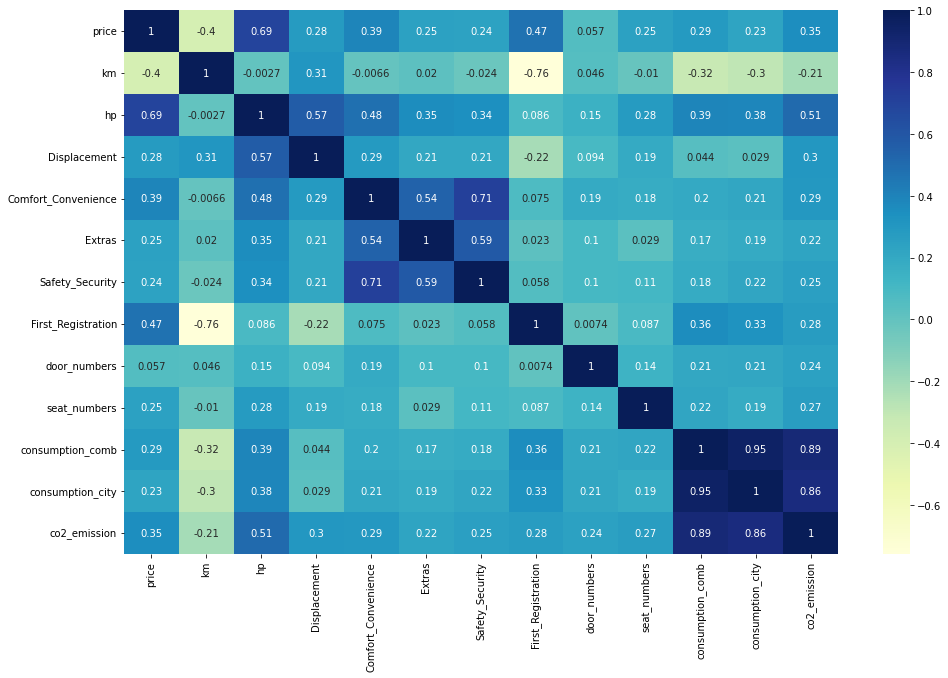

In [6]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(),cmap="YlGnBu", annot = True)

###  **price**  target  değişkeninin: 
 ###      -km feature ile negatif korelasyonlu ( -0.40 ),
###       -**confort_convience**, **hp**, ve **First_Registration** ile pozitif  korelasyonlu olduğu gözlenmektedir!
### ---------------------------------------------------------------
###     ! ( sırasıyla: 0,69 , 0.39, 0.47 )

###     sağ alt  köşede  **consumption**  değerleri ile  **co2_emission**  arasındaki pozitif  korelasyon çok  yüksektir  
 ###      - ! ( sırasıyla: 0,95 , 0.89, 0.86 )
 ### ---------------------------------------------------------------
 

###     orta kısımda   **Comfort_Convenience**  feature ile  **Extras** ve **Safety_Security**  arasındaki pozitif korelasyon  yüksektir  
 ###      - ! ( sırasıyla: 0,54 , 0.71, 0.59 ) 
 ### -----------------------------------------------------------------


###     üst  orta kısımda  ise:   **km**  feature ile  **First_Registration**   arasındaki negatif korelasyon çok yüksektir  
 ###      - ! (0.76 ) 
 ### -----------------------------------------------------------------
 
 ###     **hp**  feature ile  **Displacement** ,  **Comfort_Convenience**  ,  **co2_emission** ,**consumption** , **Extras** ve **Safety_Security**  kolonları arasında pozitif korelasyon  vardır.  
 ###      - ! ( sırasıyla: 0,57 , 0.48, (0.39, 0.38), 0.35, 0.34 ) 
 ### -----------------------------------------------------------------
 ### NOT: FEATURELAR ARASI KORELASYON VARLIĞI (çoklu doğrusal bağlantı (multicollinearity)) OLS REGRESYON ANALİZİNDE ETKİN SONUÇ VERMEYECEKTİR!!


#  Model Tanımlama

In [811]:
df

,make_model,body_type,price,km,hp,Type,Upholstery,Displacement,Fuel,Comfort_Convenience,Extras,Safety_Security,First_Registration,Body_Color,door_numbers,seat_numbers,Gearing_Type,consumption_comb,consumption_city,co2_emission
0,Audi A1,Sedans,15770,56013,66,Used,"Cloth, Black",1.422,DIESEL,16,3,14,2016.0,Black,4.0,5,Automatic,3.8,4.3,99
1,Audi A1,Sedans,14500,80000,141,Used,"Cloth, Grey",1.798,BENZINE,9,4,15,2017.0,Red,4.0,4,Automatic,5.6,7.1,129
2,Audi A1,Sedans,14640,83450,85,Used,"Cloth, Black",1.598,DIESEL,13,2,12,2016.0,Black,4.0,4,Automatic,3.8,4.4,99
3,Audi A1,Sedans,14500,73000,66,Used,Other,1.422,DIESEL,16,3,14,2016.0,Brown,4.0,4,Automatic,3.8,4.3,99
4,Audi A1,Sedans,15090,63668,85,Used,"Part leather, Black",1.598,DIESEL,17,4,14,2016.0,White,4.0,5,Automatic,3.5,4.3,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15755,Renault Espace,Van,39950,0,147,New,Other,1.997,DIESEL,20,2,19,2019.0,Grey,5.0,5,Automatic,5.3,6.2,139
15756,Renault Espace,Van,39885,9900,165,Used,Cloth,1.798,BENZINE,23,3,19,2019.0,Grey,5.0,5,Automatic,7.4,9.2,168
15757,Renault Espace,Van,39875,15,146,Pre-registered,"Full leather, Black",1.997,DIESEL,24,1,18,2019.0,White,5.0,7,Automatic,5.3,6.2,139
15758,Renault Espace,Van,39700,10,147,Pre-registered,Part leather,1.997,DIESEL,10,2,12,2019.0,Grey,5.0,7,Automatic,5.3,6.2,139


In [812]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15760 entries, 0 to 15759
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15760 non-null  object 
 1   body_type            15760 non-null  object 
 2   price                15760 non-null  int64  
 3   km                   15760 non-null  int64  
 4   hp                   15760 non-null  int64  
 5   Type                 15760 non-null  object 
 6   Upholstery           15760 non-null  object 
 7   Displacement         15760 non-null  float64
 8   Fuel                 15760 non-null  object 
 9   Comfort_Convenience  15760 non-null  int64  
 10  Extras               15760 non-null  int64  
 11  Safety_Security      15760 non-null  int64  
 12  First_Registration   15760 non-null  float64
 13  Body_Color           15760 non-null  object 
 14  door_numbers         15760 non-null  float64
 15  seat_numbers         15760 non-null 

In [619]:
df1

,make_model,body_type,price,km,hp,Type,Upholstery,Displacement,Fuel,Comfort_Convenience,Extras,Safety_Security,First_Registration,Body_Color,door_numbers,seat_numbers,Gearing_Type,consumption_comb,consumption_city,co2_emission
0,Audi A1,Sedans,15770,56013,66,Used,"Cloth, Black",1.422,DIESEL,16,3,14,2016.0,Black,4,5,Automatic,3.8,4.3,99
1,Audi A1,Sedans,14500,80000,141,Used,"Cloth, Grey",1.798,BENZINE,9,4,15,2017.0,Red,4,4,Automatic,5.6,7.1,129
2,Audi A1,Sedans,14640,83450,85,Used,"Cloth, Black",1.598,DIESEL,13,2,12,2016.0,Black,4,4,Automatic,3.8,4.4,99
3,Audi A1,Sedans,14500,73000,66,Used,Other,1.422,DIESEL,16,3,14,2016.0,Brown,4,4,Automatic,3.8,4.3,99
4,Audi A1,Sedans,15090,63668,85,Used,"Part leather, Black",1.598,DIESEL,17,4,14,2016.0,White,4,5,Automatic,3.5,4.3,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15755,Renault Espace,Van,39950,0,147,New,Other,1.997,DIESEL,20,2,19,2019.0,Grey,5,5,Automatic,5.3,6.2,139
15756,Renault Espace,Van,39885,9900,165,Used,Cloth,1.798,BENZINE,23,3,19,2019.0,Grey,5,5,Automatic,7.4,9.2,168
15757,Renault Espace,Van,39875,15,146,Pre-registered,"Full leather, Black",1.997,DIESEL,24,1,18,2019.0,White,5,7,Automatic,5.3,6.2,139
15758,Renault Espace,Van,39700,10,147,Pre-registered,Part leather,1.997,DIESEL,10,2,12,2019.0,Grey,5,7,Automatic,5.3,6.2,139


##  DATA - SCALE

In [858]:
scale_list=['Comfort_Convenience', 'Extras',
       'Safety_Security', 'door_numbers',
       'seat_numbers']

In [859]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(df[scale_list].to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[scale_list])
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,Comfort_Convenience,Extras,Safety_Security,door_numbers,seat_numbers
0,0.556434,0.512141,0.301814,-0.930448,0.099957
1,-0.611595,1.176340,0.555486,-0.930448,-1.975576
2,0.055850,-0.152058,-0.205529,-0.930448,-1.975576
3,0.556434,0.512141,0.301814,-0.930448,-1.975576
4,0.723295,1.176340,0.301814,-0.930448,0.099957


In [860]:
df_scaled

,Comfort_Convenience,Extras,Safety_Security,door_numbers,seat_numbers
0,0.556434,0.512141,0.301814,-0.930448,0.099957
1,-0.611595,1.176340,0.555486,-0.930448,-1.975576
2,0.055850,-0.152058,-0.205529,-0.930448,-1.975576
3,0.556434,0.512141,0.301814,-0.930448,-1.975576
4,0.723295,1.176340,0.301814,-0.930448,0.099957
...,...,...,...,...,...
15755,1.223879,-0.152058,1.570173,1.019274,0.099957
15756,1.724462,0.512141,1.570173,1.019274,0.099957
15757,1.891324,-0.816256,1.316501,1.019274,4.251024
15758,-0.444734,-0.152058,-0.205529,1.019274,4.251024


In [861]:
df[scale_list]=df_scaled.copy()
df

,make_model,body_type,price,km,hp,Type,Upholstery,Displacement,Fuel,Comfort_Convenience,Extras,Safety_Security,First_Registration,Body_Color,door_numbers,seat_numbers,Gearing_Type,consumption_comb,consumption_city,co2_emission
0,Audi A1,Sedans,15770,56013,66,Used,_Black,1.422,DIESEL,0.556434,0.512141,0.301814,2016.0,Black_,-0.930448,0.099957,Automatic,3.8,4.3,99
1,Audi A1,Sedans,14500,80000,141,Used,_Grey,1.798,BENZINE,-0.611595,1.176340,0.555486,2017.0,Red,-0.930448,-1.975576,Automatic,5.6,7.1,129
2,Audi A1,Sedans,14640,83450,85,Used,_Black,1.598,DIESEL,0.055850,-0.152058,-0.205529,2016.0,Black_,-0.930448,-1.975576,Automatic,3.8,4.4,99
3,Audi A1,Sedans,14500,73000,66,Used,_Other,1.422,DIESEL,0.556434,0.512141,0.301814,2016.0,Brown_,-0.930448,-1.975576,Automatic,3.8,4.3,99
4,Audi A1,Sedans,15090,63668,85,Used,_Black,1.598,DIESEL,0.723295,1.176340,0.301814,2016.0,White_,-0.930448,0.099957,Automatic,3.5,4.3,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15755,Renault Espace,Van,39950,0,147,New,_Other,1.997,DIESEL,1.223879,-0.152058,1.570173,2019.0,Grey_,1.019274,0.099957,Automatic,5.3,6.2,139
15756,Renault Espace,Van,39885,9900,165,Used,Cloth,1.798,BENZINE,1.724462,0.512141,1.570173,2019.0,Grey_,1.019274,0.099957,Automatic,7.4,9.2,168
15757,Renault Espace,Van,39875,15,146,Pre-registered,_Black,1.997,DIESEL,1.891324,-0.816256,1.316501,2019.0,White_,1.019274,4.251024,Automatic,5.3,6.2,139
15758,Renault Espace,Van,39700,10,147,Pre-registered,Part leather,1.997,DIESEL,-0.444734,-0.152058,-0.205529,2019.0,Grey_,1.019274,4.251024,Automatic,5.3,6.2,139


In [724]:
df.columns.value_counts().head(22)

make_model             1
body_type              1
consumption_city       1
consumption_comb       1
Gearing_Type           1
seat_numbers           1
door_numbers           1
Body_Color             1
First_Registration     1
Safety_Security        1
Extras                 1
Comfort_Convenience    1
Fuel                   1
Displacement           1
Upholstery             1
Type                   1
hp                     1
km                     1
price                  1
co2_emission           1
dtype: int64

Kategorik değişkenler için dummy variable'ları alalım:

**pd.get_dummies()**

In [862]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'hp', 'Type', 'Upholstery',
       'Displacement', 'Fuel', 'Comfort_Convenience', 'Extras',
       'Safety_Security', 'First_Registration', 'Body_Color', 'door_numbers',
       'seat_numbers', 'Gearing_Type', 'consumption_comb', 'consumption_city',
       'co2_emission'],
      dtype='object')

In [863]:
# kategorik sütunlar

dummies_list = ['make_model','body_type', 'Type' ,'Upholstery','Fuel','First_Registration', 'Body_Color',
                'Gearing_Type']

In [864]:
df1=df.copy()

In [865]:

for i in dummies_list:
    
    temp_df = pd.get_dummies(eval('df' + '.' + i))
    
    df = pd.concat([df, temp_df], axis=1)
    
    df.drop([i], axis=1, inplace=True, )
    

In [866]:
print(list(df.columns))

['price', 'km', 'hp', 'Displacement', 'Comfort_Convenience', 'Extras', 'Safety_Security', 'door_numbers', 'seat_numbers', 'consumption_comb', 'consumption_city', 'co2_emission', 'Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia', 'Renault Clio', 'Renault Duster', 'Renault Espace', 'Compact', 'Convertible', 'Coupe', 'Off-Road', 'Other', 'Sedans', 'Station wagon', 'Transporter', 'Van', 'Demonstration', "Employee's car", 'New', 'Pre-registered', 'Used', 'Cloth', 'Cloth, Orange', 'Cloth, Red', 'Full leather', 'Full leather, Red', 'Part leather', 'Part leather, Red', 'Velour', '_Beige', '_Black', '_Blue', '_Brown', '_Grey', '_Other', '_White', 'alcantara', 'BENZINE', 'CNG', 'DIESEL', 'Electric', 'LPG', 'Other__', 2016.0, 2017.0, 2018.0, 2019.0, 'Beige_', 'Black_', 'Blue_', 'Bronze', 'Brown_', 'Gold', 'Green', 'Grey_', 'Orange', 'Red', 'Silver', 'Violet', 'White_', 'Yellow', 'Automatic', 'Manual', 'Semi-automatic']


In [610]:
df1.door_numbers.unique()

array([4, 5, 2, 3], dtype=int8)

In [611]:
df.head()

,price,km,hp,Displacement,Comfort_Convenience,Extras,Safety_Security,door_numbers,seat_numbers,consumption_comb,...,Green,Grey,Orange,Red,Silver,Violet,White,Yellow,Manual,Semi-automatic
0,15770,56013,66,1.422,16,3,14,4,5,3.8,...,0,0,0,0,0,0,0,0,0,0
1,14500,80000,141,1.798,9,4,15,4,4,5.6,...,0,0,0,1,0,0,0,0,0,0
2,14640,83450,85,1.598,13,2,12,4,4,3.8,...,0,0,0,0,0,0,0,0,0,0
3,14500,73000,66,1.422,16,3,14,4,4,3.8,...,0,0,0,0,0,0,0,0,0,0
4,15090,63668,85,1.598,17,4,14,4,5,3.5,...,0,0,0,0,0,0,1,0,0,0


In [369]:
df.shape

(15760, 106)

In [370]:
# datadaki sütunlar
df.columns

Index([              'price',                  'km',                  'hp',
              'Displacement', 'Comfort_Convenience',              'Extras',
           'Safety_Security',    'consumption_comb',    'consumption_city',
              'co2_emission',
       ...
                         3.0,                   4.0,                   5.0,
                           3,                     4,                     5,
                           6,                     7,              'Manual',
            'Semi-automatic'],
      dtype='object', length=106)

In [476]:
df=df1.copy()
df

,make_model,body_type,price,km,hp,Type,Upholstery,Displacement,Fuel,Comfort_Convenience,Extras,Safety_Security,First_Registration,Body_Color,door_numbers,seat_numbers,Gearing_Type,consumption_comb,consumption_city,co2_emission
0,Audi A1,Sedans,15770,56013,66,Used,"Cloth, Black",1.422,DIESEL,16,3,14,2016.0,Black,4.0,5,Automatic,3.8,4.3,99
1,Audi A1,Sedans,14500,80000,141,Used,"Cloth, Grey",1.798,BENZINE,9,4,15,2017.0,Red,4.0,4,Automatic,5.6,7.1,129
2,Audi A1,Sedans,14640,83450,85,Used,"Cloth, Black",1.598,DIESEL,13,2,12,2016.0,Black,4.0,4,Automatic,3.8,4.4,99
3,Audi A1,Sedans,14500,73000,66,Used,Other,1.422,DIESEL,16,3,14,2016.0,Brown,4.0,4,Automatic,3.8,4.3,99
4,Audi A1,Sedans,15090,63668,85,Used,"Part leather, Black",1.598,DIESEL,17,4,14,2016.0,White,4.0,5,Automatic,3.5,4.3,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15755,Renault Espace,Van,39950,0,147,New,Other,1.997,DIESEL,20,2,19,2019.0,Grey,5.0,5,Automatic,5.3,6.2,139
15756,Renault Espace,Van,39885,9900,165,Used,Cloth,1.798,BENZINE,23,3,19,2019.0,Grey,5.0,5,Automatic,7.4,9.2,168
15757,Renault Espace,Van,39875,15,146,Pre-registered,"Full leather, Black",1.997,DIESEL,24,1,18,2019.0,White,5.0,7,Automatic,5.3,6.2,139
15758,Renault Espace,Van,39700,10,147,Pre-registered,Part leather,1.997,DIESEL,10,2,12,2019.0,Grey,5.0,7,Automatic,5.3,6.2,139


In [867]:
X=df.drop('price', axis=1)
X.shape

(15760, 77)

In [868]:
y=df['price']
#y=np.array(y)
y.shape

(15760,)

In [271]:
from sklearn.model_selection import train_test_split

In [869]:
#train_data, test_data = train_test_split(cars, train_size=0.8, random_state=42)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [273]:
X_train.head(), X_train.shape

(          km   hp  Displacement  Comfort_Convenience  Extras  Safety_Security  \
 11060  76000   88         1.598                   10       1               11   
 13820  40000   66         1.461                    6       1               16   
 5034      35  110         1.968                   17       3               13   
 10962  45000  103         1.364                    7       1               11   
 2354    3000  147         1.984                   18       4               15   
 
        consumption_comb  consumption_city  co2_emission  Audi A1  ...  5.0  2  \
 11060               3.9               4.7           104        0  ...    0  0   
 13820               3.2               3.4            82        0  ...    1  0   
 5034                3.9               4.2           103        0  ...    1  0   
 10962               5.6               7.3           131        0  ...    1  0   
 2354                6.0               8.2           136        1  ...    1  0   
 
        3  4

In [274]:
X_test.head(), X_test.shape

(           km   hp  Displacement  Comfort_Convenience  Extras  \
 4073       10   85         0.999                    7       1   
 15119   72200  147         1.618                   19       1   
 4337   115000   85         1.598                   13       3   
 3678    90480   81         1.598                   11       4   
 13223   32713   66         1.461                   10       2   
 
        Safety_Security  consumption_comb  consumption_city  co2_emission  \
 4073                13               5.1               6.1           118   
 15119               13               6.2               7.8           140   
 4337                10               4.2               4.7           109   
 3678                 9               3.8               4.3            99   
 13223                7               3.2               3.3            92   
 
        Audi A1  ...  5.0  2  3  4  5  6  7  Automatic  Manual  Semi-automatic  
 4073         0  ...    0  0  0  0  1  0  0          0   

In [275]:
y_test

4073     19078
15119    17900
4337     16900
3678     22280
13223    11500
         ...  
2901     15980
4099     19250
12691    28176
12886    24323
2540     22100
Name: price, Length: 4728, dtype: int32

## MODEL SEÇİMİ !!

###  1- Linear Regression

In [870]:
from sklearn import linear_model
model_lin=linear_model.LinearRegression()
model_lin.fit(X_train, y_train)

LinearRegression()

In [871]:
model_lin.score(X_train, y_train)

0.873395209313043

In [872]:
model_lin.score(X_test, y_test)     #  DÜŞÜK  SCORE !!!

0.8673831880970045

###  2- KNEİGHBORSREGRESSOR

In [780]:
from sklearn.neighbors import KNeighborsRegressor

In [781]:
knn_model=KNeighborsRegressor(n_neighbors=5,
                             weights='distance',
                            algorithm='auto',
                             p=1, leaf_size=20,
                             n_jobs=-1)
# burada n_neighbors 4  LEAF = 20 için----->score = train için 0.997  TEST  0.896
# P=1 DAHA İYİ SONUÇ VERDİ

In [782]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=20, n_jobs=-1, p=1, weights='distance')

In [783]:
knn_model.score(X_train, y_train)

0.999721515075154

In [784]:
knn_model.score(X_test, y_test)  #  y_test değeri çok düşük  - UNDER FİTTİNG -

0.7010744991673676

### 3-- NEURAL NETWORKS

In [285]:
from sklearn import neural_network    

model = neural_network.MLPClassifier(
    hidden_layer_sizes=(4,), 
    max_iter=100, 
    learning_rate_init=0.01,
    activation='logistic',
   solver='adam',
    )
model.fit(X_train, y_train)

# model.score(X_test, y_test) ---->    0.03140862944162436  alakasız bi sonuç verdi !!!

C:\Users\bayramlar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(4,),
              learning_rate_init=0.01, max_iter=100)

In [286]:
model.score(X_test, y_test)

0.013959390862944163

### 4 - RANDOM FOREST REGRESSOR 

In [1112]:
X_test

,km,hp,Displacement,Comfort_Convenience,Extras,Safety_Security,door_numbers,seat_numbers,consumption_comb,consumption_city,...,Grey_,Orange,Red,Silver,Violet,White_,Yellow,Automatic,Manual,Semi-automatic
4073,10,85,0.999,-0.945318,-0.816256,0.048143,-0.930448,0.099957,5.1,6.1,...,0,0,0,0,0,1,0,0,1,0
15119,72200,147,1.618,1.057017,-0.816256,0.048143,1.019274,4.251024,6.2,7.8,...,0,0,0,0,0,0,0,1,0,0
4337,115000,85,1.598,0.055850,0.512141,-0.712872,1.019274,0.099957,4.2,4.7,...,0,0,0,0,0,1,0,0,1,0
3678,90480,81,1.598,-0.277873,1.176340,-0.966544,-0.930448,0.099957,3.8,4.3,...,1,0,0,0,0,0,0,1,0,0
13223,32713,66,1.461,-0.444734,-0.152058,-1.473887,1.019274,0.099957,3.2,3.3,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,87657,110,1.968,-0.611595,-0.816256,-0.459200,1.019274,0.099957,4.4,5.2,...,0,0,0,0,0,0,0,1,0,0
4099,41200,85,1.598,-1.112179,-0.816256,-1.727558,-0.930448,0.099957,3.9,4.4,...,0,0,0,0,0,0,0,0,1,0
12691,0,125,1.956,1.057017,-0.816256,0.048143,1.019274,0.099957,5.0,6.0,...,1,0,0,0,0,0,0,0,1,0
12886,0,122,1.490,1.057017,-0.816256,0.048143,-0.930448,0.099957,6.0,7.0,...,0,0,0,0,0,0,0,0,1,0


In [1134]:
from sklearn.ensemble import RandomForestRegressor
random_for=RandomForestRegressor(n_estimators=160,
                                random_state=0,
                                n_jobs=-1)
random_for.fit(X_train, y_train)

RandomForestRegressor(n_estimators=160, n_jobs=-1, random_state=0)

In [290]:
random_for.feature_importances_

array([1.00933678e-01, 4.83803254e-01, 1.57280826e-02, 1.01640604e-02,
       3.13880556e-03, 7.20294577e-03, 1.41880667e-02, 1.06602445e-02,
       8.81255513e-03, 1.25132945e-02, 3.62127656e-05, 1.75173025e-02,
       1.24417803e-02, 1.03935285e-02, 1.03905315e-02, 5.48653324e-03,
       1.76199493e-04, 5.71165397e-02, 9.07824279e-04, 5.53403903e-06,
       1.35145318e-05, 2.39423251e-04, 1.34548191e-04, 4.69869588e-04,
       5.72033916e-04, 7.42735931e-05, 1.82767481e-04, 1.33344550e-03,
       2.08295553e-04, 8.68189949e-04, 1.08051454e-03, 8.95238017e-04,
       3.47238816e-07, 2.82245429e-04, 8.23679675e-07, 4.09938990e-05,
       3.86202261e-04, 4.86474213e-06, 8.36967266e-04, 1.79952861e-06,
       3.65944341e-04, 2.88504256e-04, 3.91570043e-07, 1.93299843e-03,
       6.71509072e-06, 3.31962405e-06, 1.31390968e-03, 7.16877442e-05,
       7.35349167e-04, 1.10369398e-06, 1.52920629e-03, 4.97352902e-05,
       1.56012340e-04, 1.36041163e-07, 4.28098624e-08, 1.37582530e-04,
      

In [1135]:
random_for.score(X_train, y_train)

0.9930210684322411

In [1136]:
random_for.score(X_test, y_test)

0.9448328551873416

In [440]:
print(str(y_test.shape)+ ' ' +'X test--->'+ str(X_test.shape)) 

(4728,) X test--->(4728, 105)


In [441]:
y_pred_test=random_for.predict(X_test)
y_pred_train=random_for.predict(X_train)

In [443]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error,mean_absolute_error, recall_score, r2_score, roc_auc_score, roc_curve, classification_report, SCORERS
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape
mean_absolute_errorr=mape(y_test, y_pred_test)
mean_absolute_errorr

0.05244203517104289

### GridSearchCV  FOR  RANDOM FOREST

In [839]:
from sklearn.model_selection import GridSearchCV
number_of_trees = [i for i in range(160,170,180)]  # number of base estimators trees

depth_tree = [i for i in range(3,9,1)] # height of the tree
#
max_feat = ["auto", "sqrt", "log2"]
#Defining the parameter grid
parameters = dict(n_estimators = number_of_trees, max_depth = depth_tree, max_features = max_feat)

In [840]:
## fitting the GridSearchCV on trainin data to get the best possible parameters
#
grid_search_model_1 = GridSearchCV(estimator=random_for, param_grid=parameters, return_train_score=True, cv=10)

grid_search_model_1.fit(X_train, y_train)

best_model_1 = grid_search_model_1.best_estimator_

print("best_parameters  ")

grid_search_model_1.best_params_

best_parameters  


{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}

In [842]:
from sklearn.ensemble import RandomForestRegressor
random_for=RandomForestRegressor(n_estimators=100,
                                  max_depth=8,
                                 max_features= 'auto',
                                random_state=0,
                                n_jobs=-1)
random_for.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_jobs=-1, random_state=0)

In [843]:
###
best_model_1.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_jobs=-1, random_state=0)

In [844]:
best_model_1.score(X_train, y_train)  

0.9421767940108794

In [845]:
best_model_1.score(X_test, y_test)  

0.9237119405451552

In [846]:
random_for.score(X_train, y_train)   #--  OPTİMİZE SONRASI TRAİN %94

0.9421767940108794

In [848]:
random_for.score(X_test, y_test)     #--  OPTİMİZE SONRASI TEST %92

0.9237119405451552

### PERFORMANS METRİKLERİ !!

In [451]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error,mean_absolute_error, recall_score, r2_score, roc_auc_score, roc_curve, classification_report, SCORERS
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape


In [452]:

r2_test = r2_score(y_test, y_pred_test)
r2_test


0.9445654940843019

In [453]:
mse_test = mean_squared_error(y_test, y_pred_test)
mse_test

3097514.7704512244

In [454]:
mae_test = mean_absolute_error(y_test, y_pred_test)
mae_test

962.5946559559144

In [455]:
def wape(actual,pred):
    return (np.abs((actual - pred)).sum() / actual.sum()) * 100

def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100


In [456]:
WAPE_test = wape(y_test, y_pred_test)
WAPE_test 

5.323942488685396

In [457]:
MAPE_test = mape(y_test, y_pred_test)
MAPE_test 

5.244203517104299

In [458]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_validate

Scoring_type={'R2': metrics.make_scorer(lambda x,y: 100*metrics.r2_score(x,y)),
             'MAPE': metrics.make_scorer(lambda x,y: 100*metrics.mean_absolute_percentage_error(x,y)),
             'WAPE': metrics.make_scorer(wape), 'MSE': metrics.make_scorer(lambda x,y: metrics.mean_squared_error(x,y))}
cv=KFold(n_splits=10)
cv_results=cross_validate(best_model_1, X_train, y_train, n_jobs=-1, 
                         return_train_score=True, cv=cv, scoring=Scoring_type)


In [459]:
dfcv_result=pd.DataFrame(cv_results)
dfcv_result

,fit_time,score_time,test_R2,train_R2,test_MAPE,train_MAPE,test_WAPE,train_WAPE,test_MSE,train_MSE
0,5.501676,0.315415,90.687403,91.732119,9.149342,8.403218,8.824335,8.167174,4.791005e+06,4.477529e+06
1,5.832719,0.078152,89.212673,91.909831,9.118524,8.336244,8.935212,8.098652,5.842368e+06,4.359375e+06
2,5.923341,0.240059,89.913623,91.999533,8.221627,8.372573,8.390916,8.111644,5.676447e+06,4.292569e+06
3,6.332570,0.032003,89.616248,91.932981,9.140138,8.328271,8.617455,8.128678,4.946244e+06,4.405849e+06
4,6.382995,0.216054,89.961864,91.815550,8.536764,8.425173,8.412049,8.199902,5.362045e+06,4.417598e+06
5,6.618139,0.032008,91.382419,91.785097,8.608590,8.367615,8.377643,8.145558,4.555577e+06,4.439177e+06
6,5.689608,0.336316,90.420703,91.983306,8.671940,8.274922,8.603458,8.053544,4.984524e+06,4.339506e+06
7,6.199111,0.360036,91.214914,91.677666,9.016165,8.344360,8.836250,8.145047,5.365199e+06,4.421102e+06
8,4.770352,0.364942,91.225205,91.775394,8.936815,8.337115,8.658482,8.123511,4.969558e+06,4.409890e+06
9,5.349404,0.048015,88.302800,92.070681,8.580500,8.278620,8.662363,8.038331,6.209913e+06,4.282575e+06


## Burada görüldüğü üzre  tüm performans metrikleri çok yakın 
##  sonuçları vermekte  10 katlı Cross - Validation sonuçları
## homojen yani sağlıklı sonuçlar üretmekte !!

In [373]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
yt=y_train.copy()

In [ ]:
yt.reset_index(drop=True)
yt=list(yt)
yt

In [ ]:
y_train1=y_train.copy()
y_train1.reset_index(drop=True, inplace=True)
y_train1

In [ ]:
y_test1=y_test.copy()
y_test1.reset_index(drop=True, inplace=True)
y_test1

In [ ]:
X_train1=X_train.copy()
X_train1.reset_index(drop=True, inplace=True)
X_train1

In [ ]:
X_test1=X_test.copy()
X_test1.reset_index(drop=True, inplace=True)
X_test1

In [532]:
df=df1.copy()
df

,make_model,body_type,price,km,hp,Type,Upholstery,Displacement,Fuel,Comfort_Convenience,Extras,Safety_Security,First_Registration,Body_Color,door_numbers,seat_numbers,Gearing_Type,consumption_comb,consumption_city,co2_emission
0,Audi A1,Sedans,15770,56013,66,Used,"Cloth, Black",1.422,DIESEL,16,3,14,2016.0,Black,4.0,5,Automatic,3.8,4.3,99
1,Audi A1,Sedans,14500,80000,141,Used,"Cloth, Grey",1.798,BENZINE,9,4,15,2017.0,Red,4.0,4,Automatic,5.6,7.1,129
2,Audi A1,Sedans,14640,83450,85,Used,"Cloth, Black",1.598,DIESEL,13,2,12,2016.0,Black,4.0,4,Automatic,3.8,4.4,99
3,Audi A1,Sedans,14500,73000,66,Used,Other,1.422,DIESEL,16,3,14,2016.0,Brown,4.0,4,Automatic,3.8,4.3,99
4,Audi A1,Sedans,15090,63668,85,Used,"Part leather, Black",1.598,DIESEL,17,4,14,2016.0,White,4.0,5,Automatic,3.5,4.3,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15755,Renault Espace,Van,39950,0,147,New,Other,1.997,DIESEL,20,2,19,2019.0,Grey,5.0,5,Automatic,5.3,6.2,139
15756,Renault Espace,Van,39885,9900,165,Used,Cloth,1.798,BENZINE,23,3,19,2019.0,Grey,5.0,5,Automatic,7.4,9.2,168
15757,Renault Espace,Van,39875,15,146,Pre-registered,"Full leather, Black",1.997,DIESEL,24,1,18,2019.0,White,5.0,7,Automatic,5.3,6.2,139
15758,Renault Espace,Van,39700,10,147,Pre-registered,Part leather,1.997,DIESEL,10,2,12,2019.0,Grey,5.0,7,Automatic,5.3,6.2,139


In [746]:
X=df.drop('price', axis=1)
X.shape

(15760, 99)

In [747]:
y=df['price']
#y=np.array(y)
y.shape

(15760,)

In [1140]:
#pd.DataFrame({col: df[col].astype('category').cat.codes for col in df}, index=df.index)  ## label encoding 
  
                                            ## categorilere geri döndür !!
#To create a mapping dictionary, you can just enumerate the categories using a dictionary comprehension:

#>>> {col: {n: cat for n, cat in enumerate(df[col].astype('category').cat.categories)} for col in df}

In [521]:
#df=pd.DataFrame({col: df[col].astype('category').cat.codes for col in df}, index=df.index)

In [1139]:
#df=pd.DataFrame({col: df[col].astype('category').cat.codes for col in df}, index=df.index)
#category_map={col: {n: cat for n, cat in enumerate(df[col].astype('category').cat.categories)} for col in df}

In [1138]:
#category_map={col: {n: cat for n, cat in enumerate(X_train.astype('category').cat.categories)}
             # for col in X_train}

In [507]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'hp', 'Type', 'Upholstery',
       'Displacement', 'Fuel', 'Comfort_Convenience', 'Extras',
       'Safety_Security', 'First_Registration', 'Body_Color', 'door_numbers',
       'seat_numbers', 'Gearing_Type', 'consumption_comb', 'consumption_city',
       'co2_emission'],
      dtype='object')

In [1159]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#col_list = df.select_dtypes(include = "category").columns
#for colsn in col_list:
    #df[colsn] = le.fit_transform(df[colsn].astype(str))


In [517]:
df

,make_model,body_type,price,km,hp,Type,Upholstery,Displacement,Fuel,Comfort_Convenience,Extras,Safety_Security,First_Registration,Body_Color,door_numbers,seat_numbers,Gearing_Type,consumption_comb,consumption_city,co2_emission
0,Audi A1,Sedans,15770,56013,66,Used,"Cloth, Black",1.422,DIESEL,16,3,14,2016.0,Black,4.0,5,Automatic,3.8,4.3,99
1,Audi A1,Sedans,14500,80000,141,Used,"Cloth, Grey",1.798,BENZINE,9,4,15,2017.0,Red,4.0,4,Automatic,5.6,7.1,129
2,Audi A1,Sedans,14640,83450,85,Used,"Cloth, Black",1.598,DIESEL,13,2,12,2016.0,Black,4.0,4,Automatic,3.8,4.4,99
3,Audi A1,Sedans,14500,73000,66,Used,Other,1.422,DIESEL,16,3,14,2016.0,Brown,4.0,4,Automatic,3.8,4.3,99
4,Audi A1,Sedans,15090,63668,85,Used,"Part leather, Black",1.598,DIESEL,17,4,14,2016.0,White,4.0,5,Automatic,3.5,4.3,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15755,Renault Espace,Van,39950,0,147,New,Other,1.997,DIESEL,20,2,19,2019.0,Grey,5.0,5,Automatic,5.3,6.2,139
15756,Renault Espace,Van,39885,9900,165,Used,Cloth,1.798,BENZINE,23,3,19,2019.0,Grey,5.0,5,Automatic,7.4,9.2,168
15757,Renault Espace,Van,39875,15,146,Pre-registered,"Full leather, Black",1.997,DIESEL,24,1,18,2019.0,White,5.0,7,Automatic,5.3,6.2,139
15758,Renault Espace,Van,39700,10,147,Pre-registered,Part leather,1.997,DIESEL,10,2,12,2019.0,Grey,5.0,7,Automatic,5.3,6.2,139


In [731]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, shuffle=True)
                                                   

In [536]:
X_test=pd.DataFrame({col: X_test[col].astype('category').cat.codes for col in X_test}, index=X_test.index)
X_test

,make_model,body_type,km,hp,Type,Upholstery,Displacement,Fuel,Comfort_Convenience,Extras,Safety_Security,First_Registration,Body_Color,door_numbers,seat_numbers,Gearing_Type,consumption_comb,consumption_city,co2_emission
13534,6,0,2222,4,4,23,32,2,5,0,9,0,12,3,3,1,6,5,7
13700,6,6,1973,10,4,24,32,2,6,0,9,0,7,3,3,2,10,13,16
9909,4,0,4,10,0,6,27,0,12,2,12,3,2,3,3,0,33,50,60
1217,0,0,713,27,4,6,24,0,14,2,11,1,12,3,2,1,24,36,41
12705,5,5,454,46,0,14,44,0,14,1,9,3,12,2,3,1,36,50,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12988,6,5,979,23,4,25,13,0,15,1,15,2,9,2,3,0,26,38,47
66,0,5,520,12,4,24,9,0,7,0,5,2,7,2,3,0,17,20,23
6808,3,5,1246,19,4,28,44,2,9,0,13,1,10,2,3,1,7,9,14
11360,5,6,1861,41,4,6,48,2,17,4,16,1,12,3,3,0,29,48,66


In [537]:
X_train=pd.DataFrame({col: X_train[col].astype('category').cat.codes for col in X_train}, index=X_train.index)
X_train

,make_model,body_type,km,hp,Type,Upholstery,Displacement,Fuel,Comfort_Convenience,Extras,Safety_Security,First_Registration,Body_Color,door_numbers,seat_numbers,Gearing_Type,consumption_comb,consumption_city,co2_emission
6301,3,5,1794,35,4,32,28,0,19,2,19,1,7,2,3,0,27,42,49
11247,5,5,2127,31,4,32,40,2,21,3,17,2,1,2,3,0,28,41,69
7072,3,6,2555,35,4,6,28,0,17,5,13,2,1,3,3,0,29,44,53
5988,3,5,4733,31,4,24,40,2,20,3,21,0,10,2,3,0,17,26,40
15063,8,7,3849,39,4,24,40,2,7,0,7,0,1,3,3,0,20,22,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,6,0,1415,23,4,6,13,0,12,0,13,2,12,3,3,0,27,39,45
3264,2,5,3770,18,4,32,40,2,11,0,9,0,10,2,3,1,11,14,24
9845,4,0,114,9,2,6,27,0,15,2,10,3,10,3,3,0,33,49,65
10799,5,5,2853,13,4,24,40,2,4,0,1,1,10,2,3,1,16,22,43


In [1150]:
#df=pd.read_csv('scout_outliers_done.csv')
#del df['Unnamed: 0']

## 5 -  XGBRegressor ile deneme !!!

In [943]:
    # Import the XGBoostRegressorn

from sklearn.metrics import roc_auc_score, r2_score
from sklearn import metrics
import xgboost as xgb

# Create xgboost classifer object
xgb = XGBRegressor()

# Train XGBoost Classifer
model_xgb= xgb.fit(X_train, y_train)


#Predict the response for test dataset

y_pred_train = model_xgb.predict(X_train)
y_pred_x= model_xgb.predict(X_test)


# TESTS  RESULTS

print('XGBoost ile Train R2: {0:0.2f}'.format(metrics.r2_score(y_train, y_pred_train)))
print('XGBoost ile Test R2: {0:0.2f}'.format(metrics.r2_score(y_test, y_pred_x)))

XGBoost ile Train R2: 0.98
XGBoost ile Test R2: 0.95


In [948]:
y_pred_x=pd.Series(y_pred_x)
y_pred_x=list(y_pred_x)
y_pred_x

[21893.65234375,
 25044.087890625,
 16599.796875,
 19122.662109375,
 11561.35546875,
 8573.6708984375,
 13606.8330078125,
 9696.2529296875,
 13279.18359375,
 16406.5390625,
 14975.2314453125,
 28088.244140625,
 20749.130859375,
 18352.779296875,
 10463.279296875,
 13258.7568359375,
 18867.294921875,
 17377.623046875,
 10339.5888671875,
 32888.62890625,
 34669.59375,
 37881.37890625,
 15675.6328125,
 14639.5732421875,
 17709.802734375,
 24076.623046875,
 17328.484375,
 14794.3310546875,
 19730.974609375,
 15442.921875,
 8653.83203125,
 19348.759765625,
 13259.34375,
 32537.751953125,
 13175.568359375,
 27628.263671875,
 12517.740234375,
 22186.927734375,
 9498.296875,
 36513.015625,
 24103.875,
 10069.1845703125,
 10316.2724609375,
 11820.490234375,
 20709.466796875,
 19527.658203125,
 14971.3681640625,
 20071.169921875,
 7954.01708984375,
 16707.84765625,
 15927.17578125,
 15456.240234375,
 18283.794921875,
 19829.671875,
 16294.314453125,
 15962.58984375,
 19936.734375,
 28088.2441406

In [878]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_validate

Scoring_type={'R2': metrics.make_scorer(lambda x,y: 100*metrics.r2_score(x,y)),
             'MAPE': metrics.make_scorer(lambda x,y: 100*metrics.mean_absolute_percentage_error(x,y)),
             'WAPE': metrics.make_scorer(wape), 'MSE': metrics.make_scorer(lambda x,y: metrics.mean_squared_error(x,y))}
cv=KFold(n_splits=10)
cv_results=cross_validate(model_xgb, X_train, y_train, n_jobs=-1, 
                         return_train_score=True, cv=cv, scoring=Scoring_type,verbose=True,return_estimator=True)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.3s finished


In [798]:
cv_results

{'fit_time': array([3.87617707, 4.12625003, 3.52395678, 3.33640766, 2.80520511,
        2.8520925 , 2.82899046, 2.81336188, 2.84069848, 2.9032104 ]),
 'score_time': array([0.01563001, 0.0312562 , 0.03126001, 0.01562238, 0.03126001,
        0.01562881, 0.01563215, 0.01562691, 0.03125691, 0.01562929]),
 'estimator': [XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
               num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
          

In [880]:
dfcv_result=pd.DataFrame(cv_results)
dfcv_result

,fit_time,score_time,estimator,test_R2,train_R2,test_MAPE,train_MAPE,test_WAPE,train_WAPE,test_MSE,train_MSE
0,2.864477,0.015631,"XGBRegressor(base_score=0.5, booster='gbtree',...",94.902952,98.419818,5.645071,3.908106,5.771304,3.688364,2.622253e+06,855758.496387
1,2.911367,0.015630,"XGBRegressor(base_score=0.5, booster='gbtree',...",93.760461,98.519279,5.967406,3.810057,6.103931,3.589274,3.379307e+06,797884.455780
2,3.003764,0.016000,"XGBRegressor(base_score=0.5, booster='gbtree',...",94.118475,98.437914,5.727301,3.859063,5.927933,3.657030,3.310026e+06,838121.468119
3,2.990502,0.016002,"XGBRegressor(base_score=0.5, booster='gbtree',...",95.069783,98.539096,5.695831,3.738999,5.515563,3.539541,2.348482e+06,797881.439508
4,3.762663,0.019002,"XGBRegressor(base_score=0.5, booster='gbtree',...",95.153287,98.356378,5.585958,3.914931,5.612759,3.725865,2.588957e+06,887153.128303
5,3.729661,0.020002,"XGBRegressor(base_score=0.5, booster='gbtree',...",95.684902,98.397944,5.552997,3.913612,5.523400,3.695531,2.281123e+06,865720.334330
6,2.963991,0.015631,"XGBRegressor(base_score=0.5, booster='gbtree',...",95.025188,98.386307,5.622343,3.903066,5.704858,3.693575,2.588611e+06,873505.956642
7,2.863099,0.000000,"XGBRegressor(base_score=0.5, booster='gbtree',...",95.630571,98.398072,5.889601,3.913395,5.804430,3.703566,2.668483e+06,850997.509610
8,2.984941,0.015630,"XGBRegressor(base_score=0.5, booster='gbtree',...",94.060837,98.440392,6.098764,3.883148,6.173597,3.661548,3.363613e+06,836234.347522
9,3.000571,0.015629,"XGBRegressor(base_score=0.5, booster='gbtree',...",94.202232,98.383639,5.747164,3.953552,5.879865,3.738827,3.077970e+06,872986.301126


In [ ]:
print(dfcv_result['estimator'][6])

## Burada görüldüğü üzre  tüm performans metrikleri çok yakın 
##  sonuçları vermekte  XGBRregressor ile  10 katlı Cross - Validation sonuçları Yukarda  Random Foresttan Daha İYİ, Ayrıca;
## homojen yani sağlıklı bir model üretildiğini gösteriyor !!!!


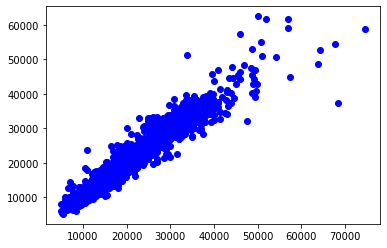

In [1156]:
plt.scatter(y_test,y_pred_x, color='blue')

In [1153]:
y_test1=np.array(y_test.copy())


In [941]:
y_pred_x

0       21893.652344
1       25044.087891
2       16599.796875
3       19122.662109
4       11561.355469
            ...     
4723    17315.966797
4724    18430.119141
4725    29703.451172
4726    25672.992188
4727    22190.689453
Length: 4728, dtype: float32

In [936]:
error_df=pd.DataFrame(y_test)

In [937]:
error_df['y_predd']=y_pred_x.copy()

In [805]:
error_df['abs_error']=abs(error_df['price']-error_df['y_predd'])
error_df

,price,y_predd,abs_error
4073,19078,21588.804688,2510.804688
15119,17900,25735.656250,7835.656250
4337,16900,16086.480469,813.519531
3678,22280,19242.861328,3037.138672
13223,11500,11810.767578,310.767578
...,...,...,...
2901,15980,17127.000000,1147.000000
4099,19250,18522.742188,727.257812
12691,28176,29308.685547,1132.685547
12886,24323,25905.527344,1582.527344


In [806]:
error_df['errors^^2']=(error_df['price']-error_df['y_predd'])**2
error_df

,price,y_predd,abs_error,errors^^2
4073,19078,21588.804688,2510.804688,6.304140e+06
15119,17900,25735.656250,7835.656250,6.139751e+07
4337,16900,16086.480469,813.519531,6.618140e+05
3678,22280,19242.861328,3037.138672,9.224211e+06
13223,11500,11810.767578,310.767578,9.657649e+04
...,...,...,...,...
2901,15980,17127.000000,1147.000000,1.315609e+06
4099,19250,18522.742188,727.257812,5.289039e+05
12691,28176,29308.685547,1132.685547,1.282977e+06
12886,24323,25905.527344,1582.527344,2.504393e+06


In [807]:
error_df[error_df.abs_error==error_df.abs_error.max()].index

Int64Index([15667], dtype='int64')

In [808]:
error_df[error_df.abs_error==error_df.abs_error.max()]##  TAHMİNDE EN BÜYÜK  SAPMA !!!

,price,y_predd,abs_error,errors^^2
15667,68320,36044.5,32275.5,1.041708e+09


In [1154]:
df1[df1.index==15667] ##  TAHMİNDE EN BÜYÜK  HATAMIZ  BURADA  !!!

,make_model,body_type,price,km,hp,Type,Upholstery,Displacement,Fuel,Comfort_Convenience,Extras,Safety_Security,First_Registration,Body_Color,door_numbers,seat_numbers,Gearing_Type,consumption_comb,consumption_city,co2_emission
15667,Renault Espace,Van,68320,4307,118,Demonstration,_Brown,1.598,DIESEL,3.059353,-0.152058,2.838531,2018.0,Black_,1.019274,-1.975576,Automatic,6.5,5.1,120


###  MARKALARA GÖRE PERFORMANS METRİC ANALİZLERİ !!

In [887]:
X_test_models=X_test.iloc[:,11:20].copy()
X_test_models

,Audi A1,Audi A2,Audi A3,Opel Astra,Opel Corsa,Opel Insignia,Renault Clio,Renault Duster,Renault Espace
4073,0,0,1,0,0,0,0,0,0
15119,0,0,0,0,0,0,0,0,1
4337,0,0,1,0,0,0,0,0,0
3678,0,0,1,0,0,0,0,0,0
13223,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
2901,0,0,1,0,0,0,0,0,0
4099,0,0,1,0,0,0,0,0,0
12691,0,0,0,0,0,1,0,0,0
12886,0,0,0,0,0,1,0,0,0


In [891]:
full_cars={}
pred_index={}
index_car=[]
final_list=[]

car_names=X_test_models.columns

for name in car_names:
    car_index=X_test_models[X_test_models[name]==1].index
    pred_index.update({name : car_index})#.append(name : car_index)
    full_cars.update({name : car_index})#.append(name : car_index)

In [892]:
pred_index['Renault Duster']

Int64Index([14745, 14773, 14755, 14746, 14759, 14760, 14749, 14772, 14775,
            14766, 14763, 14750, 14774],
           dtype='int64')

In [1155]:
df1.make_model.unique()

['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia', 'Renault Clio', 'Renault Duster', 'Renault Espace']
Categories (9, object): ['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', ..., 'Opel Insignia', 'Renault Clio', 'Renault Duster', 'Renault Espace']

In [899]:
car_names2=list(df1.make_model.unique().copy())
#car_names2.pop(1)
car_names2

['Audi A1',
 'Audi A2',
 'Audi A3',
 'Opel Astra',
 'Opel Corsa',
 'Opel Insignia',
 'Renault Clio',
 'Renault Duster',
 'Renault Espace']

In [906]:
y_test

4073     19078
15119    17900
4337     16900
3678     22280
13223    11500
         ...  
2901     15980
4099     19250
12691    28176
12886    24323
2540     22100
Name: price, Length: 4728, dtype: int32

In [905]:
y_pred_xgb1

NameError: name 'y_pred_xgb1' is not defined

In [1093]:
y_test1=y_test.copy()
y_test1=pd.DataFrame(y_test1)
y_test1.head(3)

,price
4073,19078
15119,17900
4337,16900


In [911]:
X_test_models['actual_prices']=y_test1
X_test_models['actual_prices'].head(3)

4073     19078
15119    17900
4337     16900
Name: actual_prices, dtype: int32

In [ ]:
katt=list(y_pred_xgb['y_pred_xgb1'])
katt


In [913]:
y_pred_x=pd.Series(y_pred_x)
y_pred_x

0       21893.652344
1       25044.087891
2       16599.796875
3       19122.662109
4       11561.355469
            ...     
4723    17315.966797
4724    18430.119141
4725    29703.451172
4726    25672.992188
4727    22190.689453
Length: 4728, dtype: float32

In [952]:
X_test_models['pred_price']=list(y_pred_x)
X_test_models['pred_price']

4073     21893.652344
15119    25044.087891
4337     16599.796875
3678     19122.662109
13223    11561.355469
             ...     
2901     17315.966797
4099     18430.119141
12691    29703.451172
12886    25672.992188
2540     22190.689453
Name: pred_price, Length: 4728, dtype: float64

In [918]:
df1

,make_model,body_type,price,km,hp,Type,Upholstery,Displacement,Fuel,Comfort_Convenience,Extras,Safety_Security,First_Registration,Body_Color,door_numbers,seat_numbers,Gearing_Type,consumption_comb,consumption_city,co2_emission
0,Audi A1,Sedans,15770,56013,66,Used,_Black,1.422,DIESEL,0.556434,0.512141,0.301814,2016.0,Black_,-0.930448,0.099957,Automatic,3.8,4.3,99
1,Audi A1,Sedans,14500,80000,141,Used,_Grey,1.798,BENZINE,-0.611595,1.176340,0.555486,2017.0,Red,-0.930448,-1.975576,Automatic,5.6,7.1,129
2,Audi A1,Sedans,14640,83450,85,Used,_Black,1.598,DIESEL,0.055850,-0.152058,-0.205529,2016.0,Black_,-0.930448,-1.975576,Automatic,3.8,4.4,99
3,Audi A1,Sedans,14500,73000,66,Used,_Other,1.422,DIESEL,0.556434,0.512141,0.301814,2016.0,Brown_,-0.930448,-1.975576,Automatic,3.8,4.3,99
4,Audi A1,Sedans,15090,63668,85,Used,_Black,1.598,DIESEL,0.723295,1.176340,0.301814,2016.0,White_,-0.930448,0.099957,Automatic,3.5,4.3,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15755,Renault Espace,Van,39950,0,147,New,_Other,1.997,DIESEL,1.223879,-0.152058,1.570173,2019.0,Grey_,1.019274,0.099957,Automatic,5.3,6.2,139
15756,Renault Espace,Van,39885,9900,165,Used,Cloth,1.798,BENZINE,1.724462,0.512141,1.570173,2019.0,Grey_,1.019274,0.099957,Automatic,7.4,9.2,168
15757,Renault Espace,Van,39875,15,146,Pre-registered,_Black,1.997,DIESEL,1.891324,-0.816256,1.316501,2019.0,White_,1.019274,4.251024,Automatic,5.3,6.2,139
15758,Renault Espace,Van,39700,10,147,Pre-registered,Part leather,1.997,DIESEL,-0.444734,-0.152058,-0.205529,2019.0,Grey_,1.019274,4.251024,Automatic,5.3,6.2,139


In [1094]:
y_test1['y_pred_xgb1']=y_pred_x

In [1095]:
y_test1

,price,y_pred_xgb1
4073,19078,21893.652344
15119,17900,25044.087891
4337,16900,16599.796875
3678,22280,19122.662109
13223,11500,11561.355469
...,...,...
2901,15980,17315.966797
4099,19250,18430.119141
12691,28176,29703.451172
12886,24323,25672.992188


In [ ]:
full_cars['Audi A1']

In [ ]:
y_test[full_cars['Renault Espace']]

In [1097]:
np.array(y_test1.y_pred_xgb1[full_cars[car]])

array([25044.08789062, 37881.37890625, 32537.75195312, 19527.65820312,
       33512.82421875, 38167.64453125, 43600.84375   , 22234.91796875,
       19867.95703125, 31992.55859375, 28894.14648438, 21053.90429688,
       24217.2734375 , 27361.2734375 , 34138.2890625 , 23968.52148438,
       45823.5390625 , 24997.14648438, 33207.14453125, 22398.86328125,
       31999.13867188, 20811.4375    , 36022.08984375, 44393.38671875,
       31139.80859375, 22624.51953125, 22517.28125   , 20329.51367188,
       18043.50585938, 18231.93945312, 27768.65039062, 20959.06640625,
       21107.484375  , 25531.10742188, 31792.62304688, 33389.2734375 ,
       23130.546875  , 34338.93359375, 31639.9921875 , 28154.14453125,
       18058.0859375 , 40874.07421875, 44425.62890625, 20370.453125  ,
       22927.66015625, 21488.65039062, 19100.44140625, 15148.21777344,
       31044.80859375, 35153.1796875 , 19085.26953125, 29172.72265625,
       36872.5       , 21240.80078125, 42836.6171875 , 32752.2734375 ,
      

In [1096]:
y_test1.price[np.array(full_cars['Renault Espace'])]

15119    17900
15547    37870
15603    34200
15066    19950
15625    34170
         ...  
15289    33800
15188    27950
15317    32935
14800    26890
15533    38290
Name: price, Length: 285, dtype: int32

In [953]:
X1=X_test_models.copy()
X1

,Audi A1,Audi A2,Audi A3,Opel Astra,Opel Corsa,Opel Insignia,Renault Clio,Renault Duster,Renault Espace,actual_prices,pred_price
4073,0,0,1,0,0,0,0,0,0,19078,21893.652344
15119,0,0,0,0,0,0,0,0,1,17900,25044.087891
4337,0,0,1,0,0,0,0,0,0,16900,16599.796875
3678,0,0,1,0,0,0,0,0,0,22280,19122.662109
13223,0,0,0,0,0,0,1,0,0,11500,11561.355469
...,...,...,...,...,...,...,...,...,...,...,...
2901,0,0,1,0,0,0,0,0,0,15980,17315.966797
4099,0,0,1,0,0,0,0,0,0,19250,18430.119141
12691,0,0,0,0,0,1,0,0,0,28176,29703.451172
12886,0,0,0,0,0,1,0,0,0,24323,25672.992188


In [920]:
X1.index

Int64Index([ 4073, 15119,  4337,  3678, 13223,  9084, 13094, 11066, 11094,
            12955,
            ...
            10044, 11297,  9551,  7781, 15533,  2901,  4099, 12691, 12886,
             2540],
           dtype='int64', length=4728)

In [956]:
X1['make_model']=df1.make_model[X1.index]

In [957]:
X1.columns

Index(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster', 'Renault Espace',
       'actual_prices', 'pred_price', 'make_model'],
      dtype='object')

In [958]:
car_names3=X1.columns[:9]

In [959]:
Wape_list=[]
for i in range(9):
    wape_list=wape(X1[X1['make_model']==car_names3[i]]['actual_prices'], X1[X1['make_model']==car_names3[i]]['pred_price'])
    Wape_list.append(wape_list)     
Wape_list                                                                       

C:\Users\BAYRAM~1\AppData\Local\Temp/ipykernel_9616/1878912541.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (np.abs((actual - pred)).sum() / actual.sum()) * 100


[4.717563580918424,
 nan,
 4.800889798906564,
 5.813391909409076,
 5.2365907484515075,
 5.997267087671712,
 6.343607720093887,
 16.043113521163846,
 8.303842201380473]

In [1082]:
Wape_list2=Wape_list.copy()
Wape_list2.pop(1)
Wape_list2

[4.717563580918424,
 4.800889798906564,
 5.813391909409076,
 5.2365907484515075,
 5.997267087671712,
 6.343607720093887,
 16.043113521163846,
 8.303842201380473]

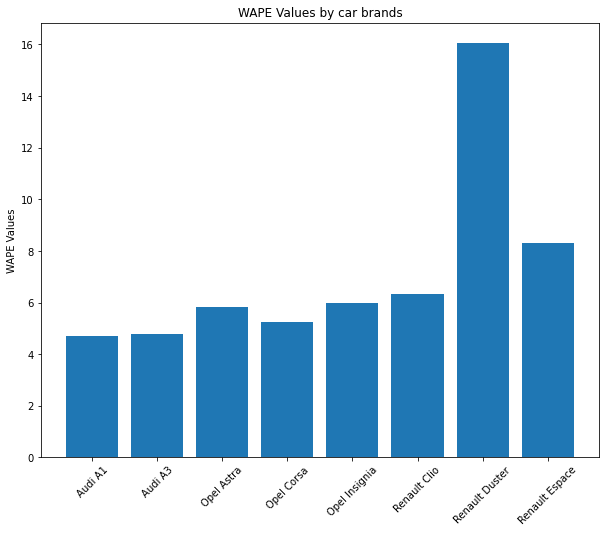

In [1083]:
plt.figure(figsize=(10,8))
plt.bar(car_names2,Wape_list2)
plt.xticks(rotation = 45)
plt.title("WAPE Values by car brands")
plt.ylabel("WAPE Values")
plt.show()

In [966]:
df1.make_model.value_counts() # audi  a2 sadece  1 adet araç var !!

Audi A3           3068
Audi A1           2588
Opel Insignia     2565
Opel Astra        2501
Opel Corsa        2195
Renault Clio      1824
Renault Espace     984
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [ ]:
X_test

In [1137]:
X_test.iloc[:,6:15].columns

Index(['door_numbers', 'seat_numbers', 'consumption_comb', 'consumption_city',
       'co2_emission', 'Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra'],
      dtype='object')

In [967]:
car_names=X1.columns[:9]
car_names

Index(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster', 'Renault Espace'],
      dtype='object')

In [972]:
X1

,Audi A1,Audi A2,Audi A3,Opel Astra,Opel Corsa,Opel Insignia,Renault Clio,Renault Duster,Renault Espace,actual_prices,pred_price,make_model
4073,0,0,1,0,0,0,0,0,0,19078,21893.652344,Audi A3
15119,0,0,0,0,0,0,0,0,1,17900,25044.087891,Renault Espace
4337,0,0,1,0,0,0,0,0,0,16900,16599.796875,Audi A3
3678,0,0,1,0,0,0,0,0,0,22280,19122.662109,Audi A3
13223,0,0,0,0,0,0,1,0,0,11500,11561.355469,Renault Clio
...,...,...,...,...,...,...,...,...,...,...,...,...
2901,0,0,1,0,0,0,0,0,0,15980,17315.966797,Audi A3
4099,0,0,1,0,0,0,0,0,0,19250,18430.119141,Audi A3
12691,0,0,0,0,0,1,0,0,0,28176,29703.451172,Opel Insignia
12886,0,0,0,0,0,1,0,0,0,24323,25672.992188,Opel Insignia


In [980]:
MAE_list=[]
car_names2=['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster', 'Renault Espace']
for car in car_names2:     
    mae_list = mean_absolute_error(X1.actual_prices[full_cars[car]], np.array(X1.pred_price[full_cars[car]]))
    MAE_list.append(mae_list)


In [ ]:
ada=list(zip(car_names2,MAE_list))

In [ ]:
ada[0][0]

In [ ]:
MAE_list

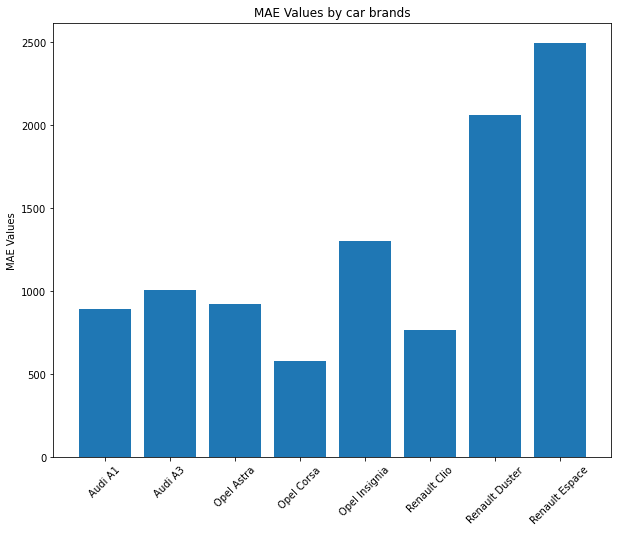

In [981]:
plt.figure(figsize=(10,8))
plt.bar(car_names2,MAE_list)
plt.xticks(rotation = 45)
plt.title("MAE Values by car brands")
plt.ylabel("MAE Values")
plt.show()

In [982]:
Scoring_type = {'R2': metrics.make_scorer(lambda x, y: 100*metrics.r2_score(x,y)),
                'MAPE': metrics.make_scorer(lambda x,y: 100*metrics.mean_absolute_percentage_error(x,y)), 
                'WAPE': metrics.make_scorer(wape) ,
                "MSE": metrics.make_scorer(lambda x,y: metrics.mean_squared_error(x,y))}

In [1087]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE_list=[]

for car in car_names2:     
    mape_list = mean_absolute_percentage_error(X1.actual_prices[full_cars[car]], np.array(X1.pred_price[full_cars[car]]))
    MAPE_list.append(mape_list)


In [1086]:
X1

,Audi A1,Audi A2,Audi A3,Opel Astra,Opel Corsa,Opel Insignia,Renault Clio,Renault Duster,Renault Espace,actual_prices,pred_price,make_model
4073,0,0,1,0,0,0,0,0,0,19078,21893.652344,Audi A3
15119,0,0,0,0,0,0,0,0,1,17900,25044.087891,Renault Espace
4337,0,0,1,0,0,0,0,0,0,16900,16599.796875,Audi A3
3678,0,0,1,0,0,0,0,0,0,22280,19122.662109,Audi A3
13223,0,0,0,0,0,0,1,0,0,11500,11561.355469,Renault Clio
...,...,...,...,...,...,...,...,...,...,...,...,...
2901,0,0,1,0,0,0,0,0,0,15980,17315.966797,Audi A3
4099,0,0,1,0,0,0,0,0,0,19250,18430.119141,Audi A3
12691,0,0,0,0,0,1,0,0,0,28176,29703.451172,Opel Insignia
12886,0,0,0,0,0,1,0,0,0,24323,25672.992188,Opel Insignia


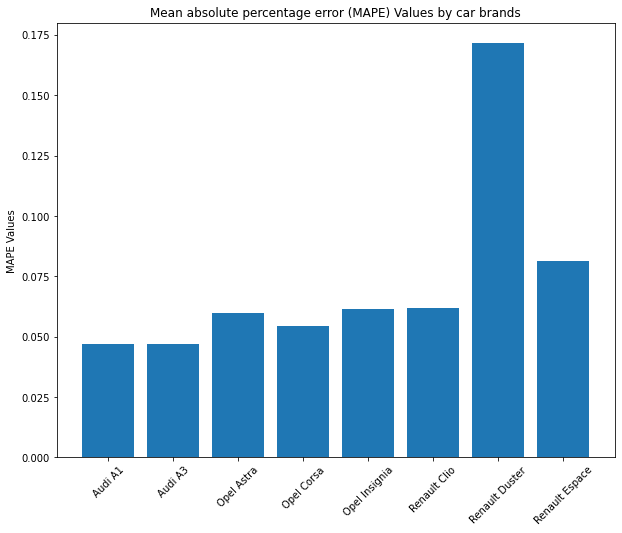

In [1088]:
plt.figure(figsize=(10,8))
plt.bar(car_names2,MAPE_list)
plt.xticks(rotation = 45)
plt.title("Mean absolute percentage error (MAPE) Values by car brands")
plt.ylabel("MAPE Values")
plt.show()

In [986]:
brand_list=X1.make_model.unique()

In [987]:
std_list = []
for i in brand_list:
    std1 = np.std(X1[X1["make_model"] == i]["actual_prices"])
    std_list.append(std1)

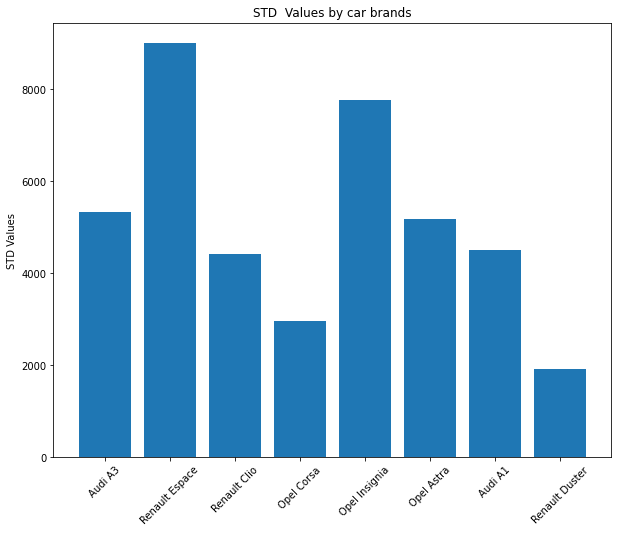

In [988]:
plt.figure(figsize=(10,8))
plt.bar(brand_list,std_list)
plt.xticks(rotation = 45)
plt.title("STD  Values by car brands")
plt.ylabel("STD Values")
plt.show()

In [ ]:
#X1=df1.drop('price',axis=1).copy()
pred_price=np.round(model_xgb.predict(X1), 0)
X1.insert(0, 'pred_price', pred_price)


In [ ]:
X1

In [ ]:
models =df1['make_model']
prices=df1['price']
X1.insert(0, 'make_model', models)
X1.insert(1, 'actual_prices', prices)
X1

In [ ]:
X1.iloc[:,8:18]

In [1089]:
sns.jointplot(data=X1.loc[8158:11000] , x="pred_price", y="actual_prices", hue=X1["Opel Corsa"])

KeyError: 11000

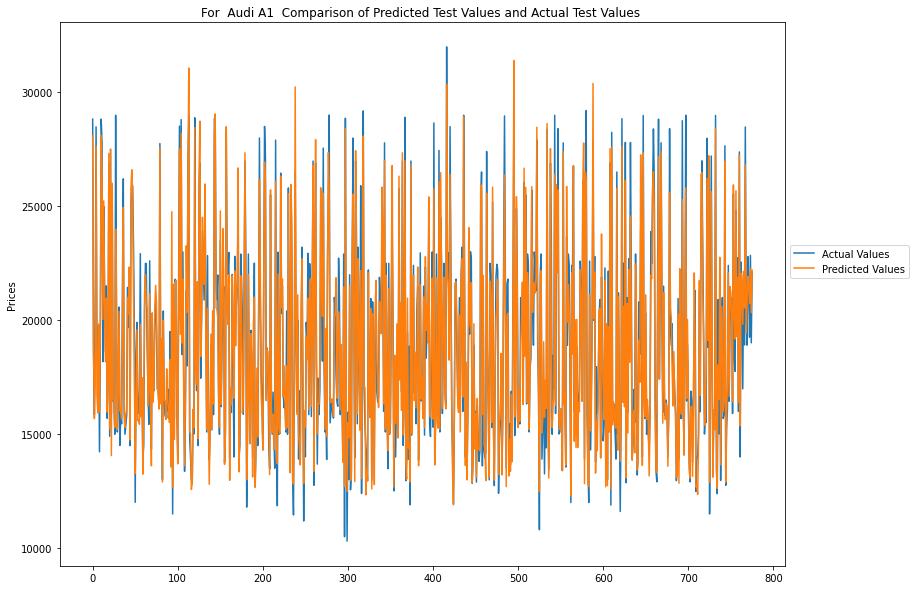

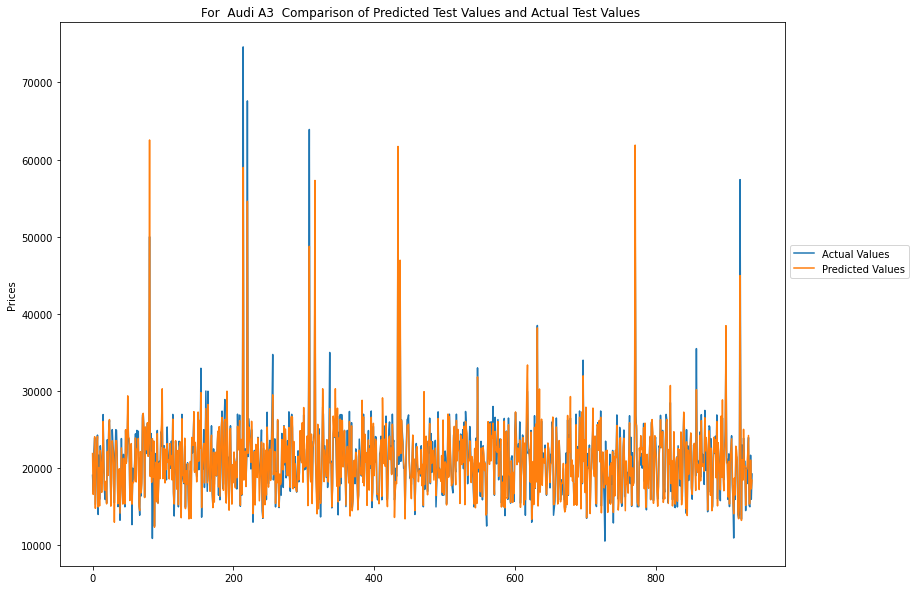

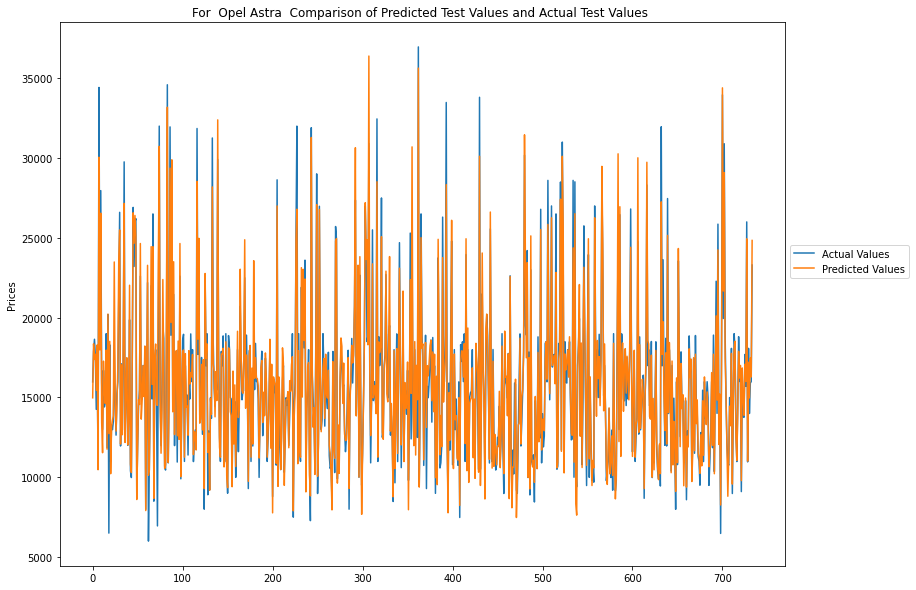

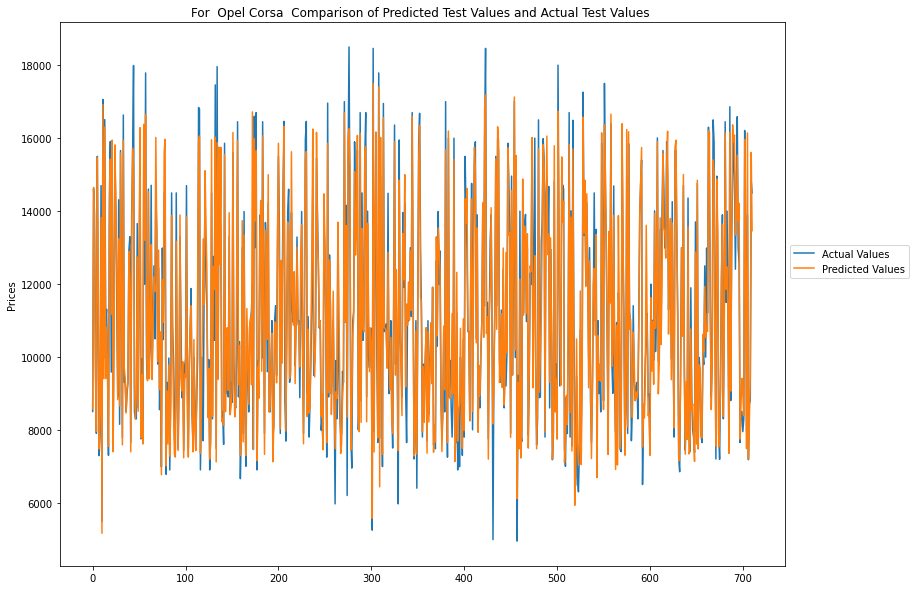

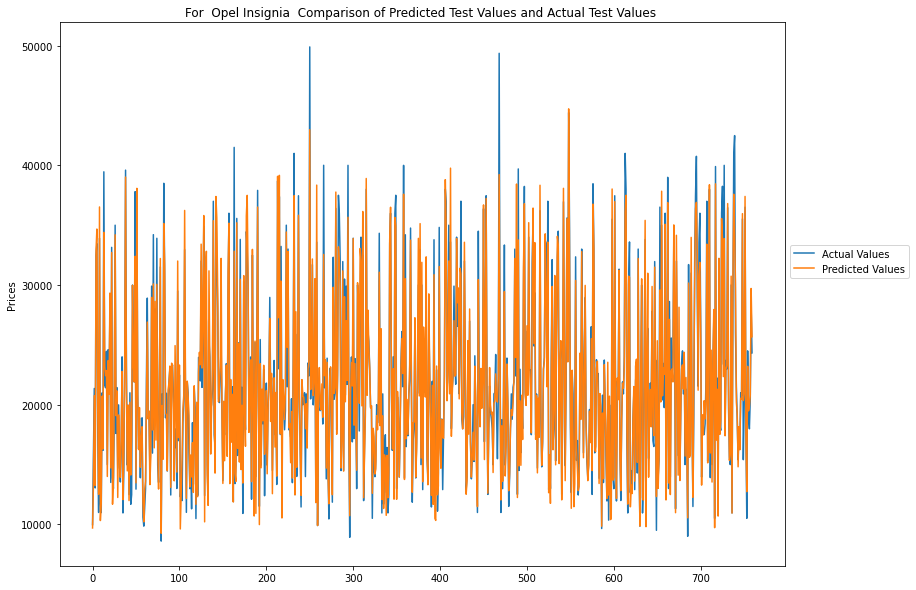

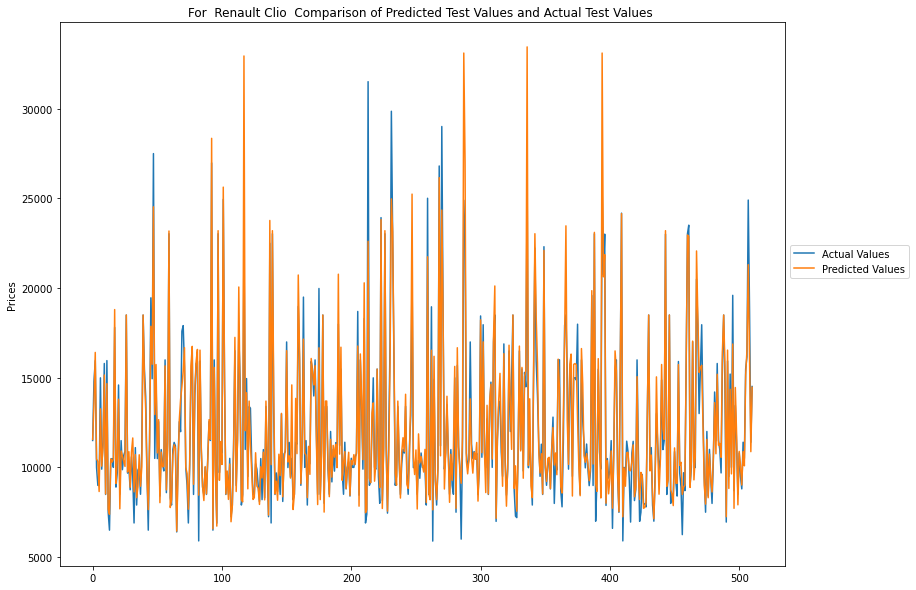

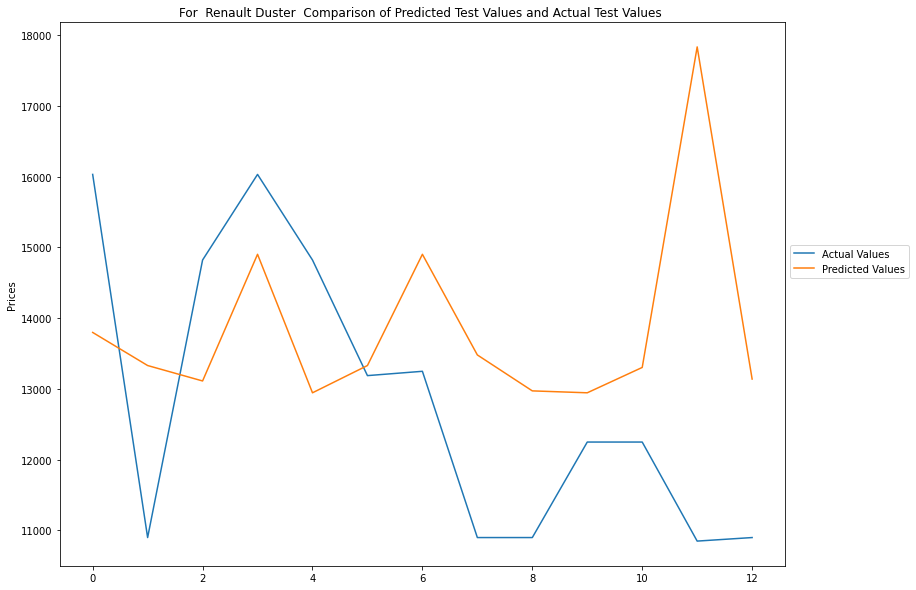

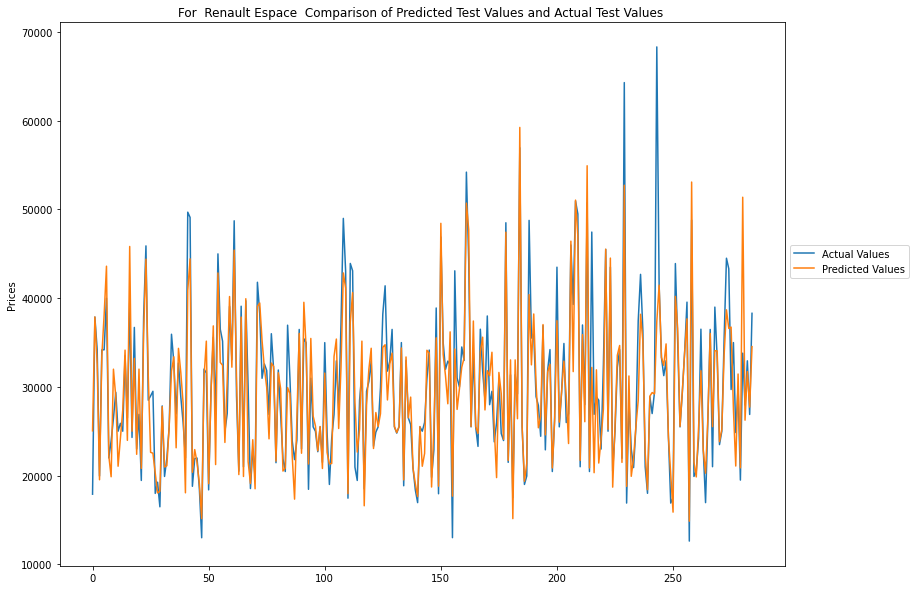

In [1147]:
for col in car_names2:
    #for i in range(0, len(full_cars[col])):
    listt=full_cars[col]    
    plt.figure(figsize=(13,10))
    plt.plot(np.array(y_test1.price[listt]), label="Actual Values")
    plt.plot(np.array(y_test1.y_pred_xgb1[listt]), label="Predicted Values")
    plt.legend(bbox_to_anchor=(1,0.6))
    plt.title("For  " + col +"  Comparison of Predicted Test Values and Actual Test Values ")
    plt.ylabel('Prices')
    plt.show()
    

## -------------------------------      BIAS  GRAPH !!          ---------------------------------------

In [ ]:
np.array(error_df.price[car_index])

In [994]:
arabalar_için_bias_listesi = []
for i in range(8):
    fark = (X1[X1["make_model"] == X1["make_model"].unique()[i]]["pred_price"]) - (X1[X1["make_model"] == X1["make_model"].unique()[i]]["actual_prices"])
    toplam_fark = np.sum(fark)
    bias = toplam_fark / np.sum(X1[X1["make_model"] == X1["make_model"].unique()[i]]["actual_prices"])
    arabalar_için_bias_listesi.append(bias)
arabalar_için_bias_listesi

[-0.0018590821069993148,
 -0.018596053495460507,
 0.010023236196579988,
 0.0009524652803910482,
 -0.001654320319253335,
 0.005158638075046449,
 -0.0034458598095308745,
 0.07725680548365958]

In [995]:
arabalar_için_bias_listesi = np.array(arabalar_için_bias_listesi)

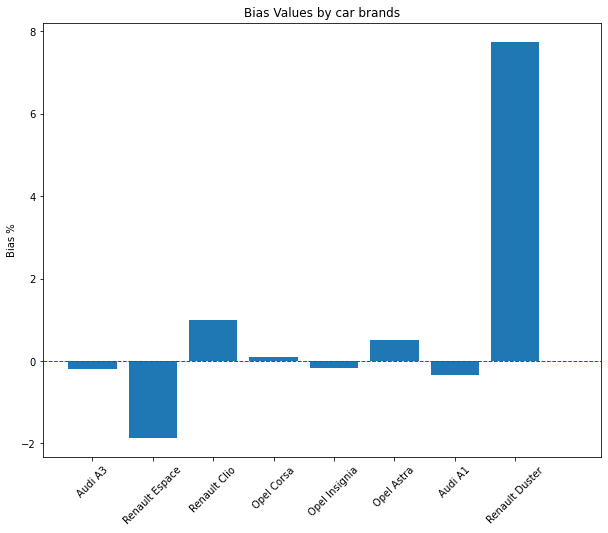

In [996]:
brand_list = X1["make_model"].unique()
plt.figure(figsize=(10,8))
plt.bar(brand_list, arabalar_için_bias_listesi*100)
plt.xticks(rotation = 45)
plt.title("Bias Values by car brands")
plt.ylabel("Bias %")
plt.axline((1, 0), (8, 0), linewidth=1, color='r', linestyle="--")
plt.show()

####  YUKARDA  RENAULT DUSTER  YÜKSEK BİAS' LA - ( % 10  için kabul edilir sınırda )-  ÇIKMIŞTIR  NEDENİ :  ÖRNEKLEM SAYISI DÜŞÜKTÜR .
####  VE  2 .Cİ  İSTENEN  PROBLEM  OLAN  ':OPEL CORSA' MODELİNDEKİ YÜKSEK BİAS DÜŞÜRÜLMÜŞTÜR !!!!!!!!!

In [1075]:
df1.make_model[df1.make_model=='Renault Duster'].value_counts()[0]

34

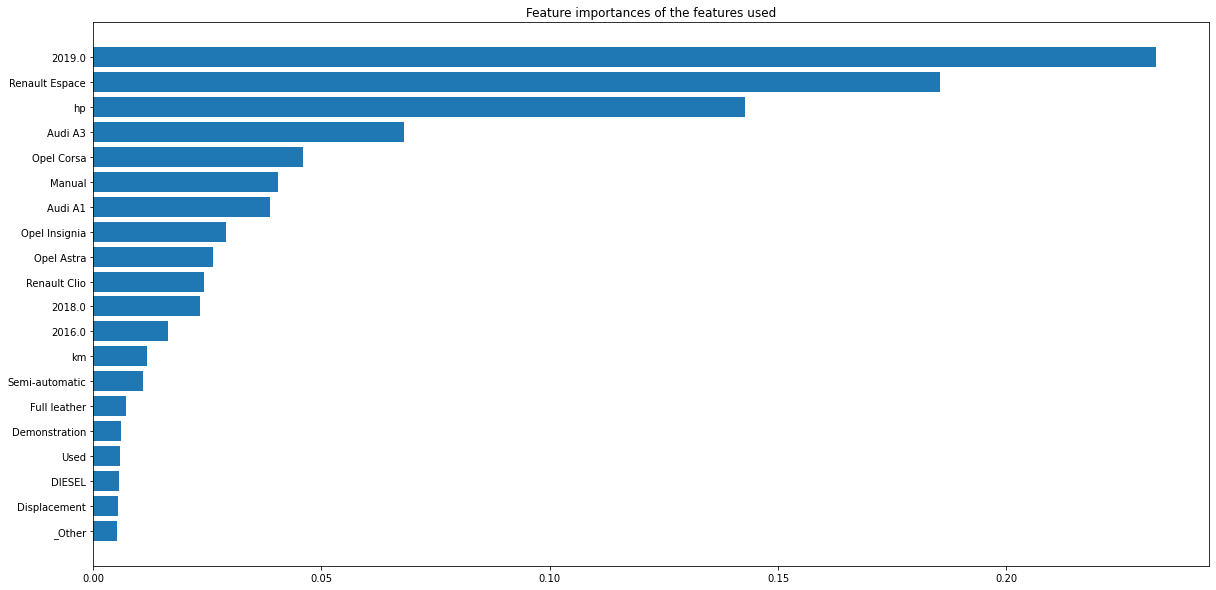

In [1152]:
#Seeing feature importances
feature_importances = model_xgb.feature_importances_
feature_list = list(X)

relative_importance = pd.DataFrame(index=feature_list, data=feature_importances, columns = ["importance"])
relative_importance.index = relative_importance.index.map(str)

importances1 = relative_importance.sort_values(by="importance", ascending=True).tail(20)
importance_index = importances1.index.to_list()

importances2 = importances1["importance"]
importances3 = list(importances2.values)

plt.figure(figsize=(20,10))
#importances1 = relative_importance.sort_values(by="importance", ascending=True).tail(20)
plt.barh(importance_index,importances3) 
plt.title("Feature importances of the features used")
plt.show()

### YUKARDA DA GÖRÜLECEĞİ VE BEKLENİLDİĞİ  GİBİ GENEL OLARAK ! ARAÇLARIN FİYATLARININ BELİRLENMESİNDE EN FAZLA ARACIN SON MODEL YANİ 2019 OLMASI SONRA YÜKSEK BEYGİR GÜCÜ  
### ARDINDAN  MARKA MODELİNİN NE OLDUĞU SONRA DA GRAFİKTEKİ  DİĞER DEĞİŞKENLERE GÖRE KATSAYILARININ ÖNEMİ
### ANLAŞILMAKTADIR !!!

### MODELİMİZİ SON KULLANIM İÇİN KAYDEDELİM !!!!

In [998]:
import joblib
joblib.dump(model_xgb, 'auto_scout_price_model')

['auto_scout_price_model']

#### ŞİMDİ BİR ÖRNEK ÇEKEREK MODELİ KULLANMAYI DENEYELİM !!

In [999]:
auto_scout_model=joblib.load('auto_scout_price_model')

Modelimiz joblib'den çağrılabiliyor mu bakalım.

In [1000]:
## şimdi tahmin yapalım !!
auto_scout_model.predict(X_test)


array([21893.652, 25044.088, 16599.797, ..., 29703.451, 25672.992,
       22190.69 ], dtype=float32)

#   ---------------------------                                         FİNAL                                 --------------

###  EVET MODEL BAŞARIYLA KAYDEDİLEREK TEST EDİLMİŞTİR VE KULLANIMA HAZIR !!
###  ÖRNEK DATAFRAME DE AŞAĞIDA OLUŞTURULMUŞTUR !!!

In [1003]:

data_range=[i for i in range(7000)]
df_example=df.drop('price', axis=1)
df_example=df_example.iloc[data_range]
X_train.to_json(r'C:\Users\bayramlar\Desktop\SUNUM AUTO SCOUT\X_train2.json')


In [ ]:
#  TRAİN DATASINI  ÖRNEK OLARAK KAYDEDELİM

In [ ]:
X_train.to_excel(r'C:\Users\bayramlar\Desktop\auto scout\AUTO_SCOUT_PRİCE_PROJECT\X_train.xlsx', index=False)

In [ ]:
#KONTROL OKUMASI YAPALIM
check_df_X_train=pd.read_excel(r'C:\Users\bayramlar\Desktop\auto scout\AUTO_SCOUT_PRİCE_PROJECT\X_train.xlsx')
check_df_X_train

#### Tekli (Univariate) Analiz

Değişkenlere  kendi içlerinde bakıp nasıl göründüğünü inceleyelim:

C:\Users\bayramlar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


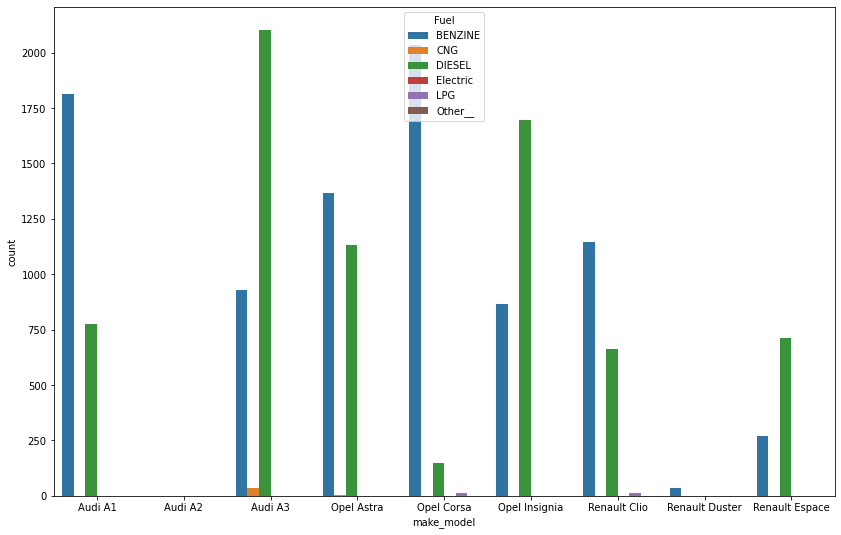

In [1010]:
# symboling -> sigorta riski
fig = plt.figure(figsize=(14,9))
sns.countplot(df1.make_model, hue=df1.Fuel)
plt.show()

##  GÖRÜLCEĞİ ÜZRE BENZİNLİ ARAÇ KULLANIMI BENZER YOUNLUKTA!!

C:\Users\bayramlar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


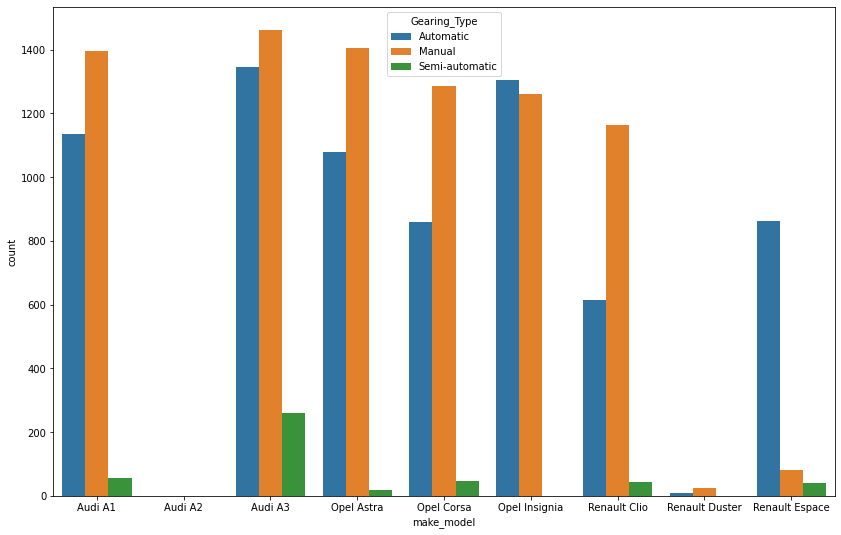

In [1011]:
# symboling -> sigorta riski
fig = plt.figure(figsize=(14,9))
sns.countplot(df1.make_model, hue=df1.Gearing_Type)
plt.show()

# SATILAN ARAÇLARDA MANUEL  ARAÇLAR DAHA FAZLA  SATILMIŞ !!  YARI OTOMATİK ARAÇLARIN ORANI İSE ÇOK
# DÜŞÜK ORANLARDA !

#### İkili (Bivariate) Analiz

Şimdi değişkenlerin Fiyat'ı nasıl etkilediğini görmeye çalışalım:

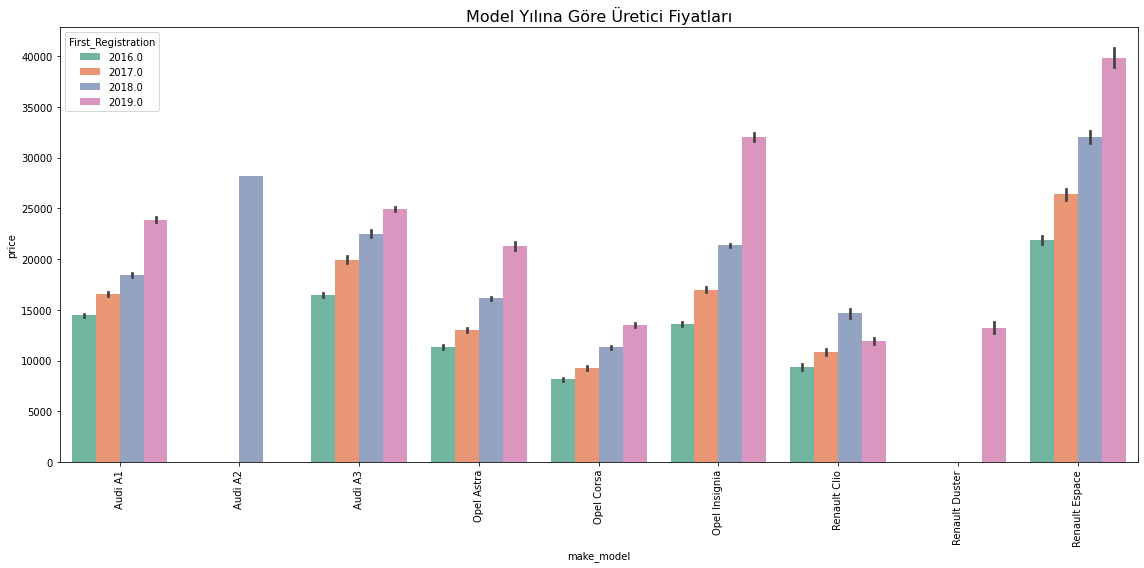

In [1013]:
#Yıllara Göre Üretici bazlı ortalama fiyatlar

plt.figure(figsize=(16,8))
plt.title('Model Yılına Göre Üretici Fiyatları', fontsize=16)
sns.barplot(x=df1.make_model, y=df1.price, 
            hue=df1.First_Registration, palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()



In [ ]:
list_car1=X_test_models[X_test_models['Renault Espace']==1].index

In [ ]:
list_car1

In [ ]:
car_names=X_test_models.columns
car_names

In [ ]:
full_cars={}
pred_index={}
index_car=[]
final_list=[]

car_names=X_test_models.columns

for name in car_names:
    car_index=X_test_models[X_test_models[name]==1].index
    pred_index.update({name : car_index})#.append(name : car_index)
    full_cars.update({name : car_index})#.append(name : car_index)

In [ ]:
y_pred_xgb1=y_pred_xgb2.copy()
y_pred_xgb1=pd.DataFrame(y_pred_xgb1, columns=['y_pred_xgb1'])
y_pred_xgb1.head(3)

In [ ]:
y_test1=y_test.copy()
y_test1=pd.DataFrame(y_test1)
y_test1.head(3)

In [1148]:
np.array(y_test1.price[listt])

array([17900, 37870, 34200, 19950, 34170, 34180, 39990, 21990, 23900,
       26450, 29385, 25000, 25885, 25000, 33500, 26490, 39485, 24299,
       36699, 22990, 26900, 19450, 37900, 45890, 28500, 28975, 29500,
       17990, 19250, 16480, 27850, 19900, 21950, 25490, 35930, 32750,
       26950, 32685, 28890, 25995, 21990, 49690, 49100, 18790, 21900,
       21975, 18538, 12990, 32000, 31570, 18390, 29500, 35580, 27000,
       44990, 36498, 35146, 24980, 26994, 39070, 33070, 48720, 28975,
       20500, 39089, 20990, 39700, 30000, 18538, 22990, 19850, 41790,
       38290, 30965, 32576, 31850, 26880, 35990, 31900, 21450, 31900,
       26990, 21890, 20455, 36950, 31000, 23900, 21800, 23990, 36470,
       23000, 35425, 34975, 18450, 30980, 25490, 24990, 22690, 25490,
       21495, 34985, 24900, 18999, 24200, 26900, 32930, 27400, 37100,
       48990, 43000, 17450, 43911, 43080, 20950, 19450, 28490, 31570,
       18500, 29500, 30590, 32900, 23300, 24900, 25490, 29900, 38200,
       41390, 31775,